
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        ## loss =  (0.1)*loss_SI + Curve_SIMs[0] + Curve_SIMs[1] + Curve_SIMs[2] + Curve_SIMs[3]  
        loss =  (0.001)*loss_SI + Curve_SIMs[0]  
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        history['loss_SIM2'].append( Curve_SIMs[2] )
        history['loss_SIM3'].append( Curve_SIMs[3] )
        history['loss_SIM4'].append( Curve_SIMs[4] )
        history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  4.519268035888672
seq length of pred =  30
500 train loss =  4.445977687835693
seq length of pred =  30
1000 train loss =  4.109096050262451
seq length of pred =  30
1500 train loss =  4.529006004333496
seq length of pred =  30
2000 train loss =  4.2336039543151855
seq length of pred =  30
2500 train loss =  3.8103880882263184
seq length of pred =  30


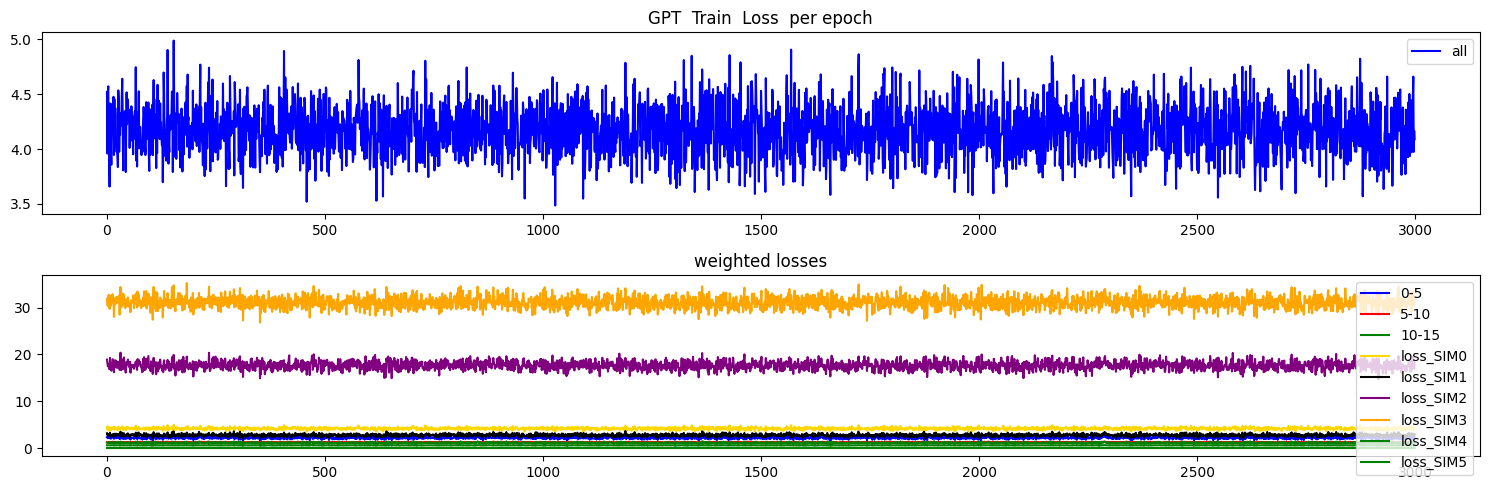

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.046414993703365326
Test MSE Loss - SI only 0-5:  0.036190666258335114
Test MSE Loss - SI only 5-10:  0.07638398557901382
Test MSE Loss - SI only 10-15:  0.07152655720710754
mae, mse, rmse, mape, mspe, rse, corr
(0.16330138, 0.046414994, 0.21544139, 3.201822, 52.51309, 1.2472997)
Testing R**2 - SI only:  -0.5557568410873892
Testing R**2 - SI only:  -0.5557568410873892
Testing R**2 - All features:  0.9566367836378171
Testing R**2 - (f2) - SI full:  0.3437542579985965


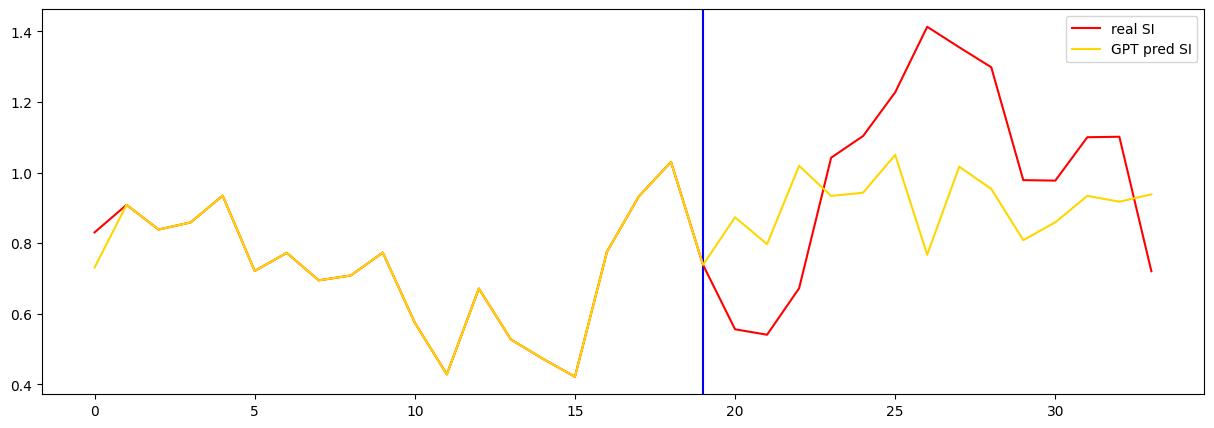

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  4.368994235992432
seq length of pred =  30
500 train loss =  4.311230182647705
seq length of pred =  30
1000 train loss =  3.9972784519195557
seq length of pred =  30
1500 train loss =  4.002523899078369
seq length of pred =  30
2000 train loss =  3.585850954055786
seq length of pred =  30
2500 train loss =  4.163086414337158
seq length of pred =  30


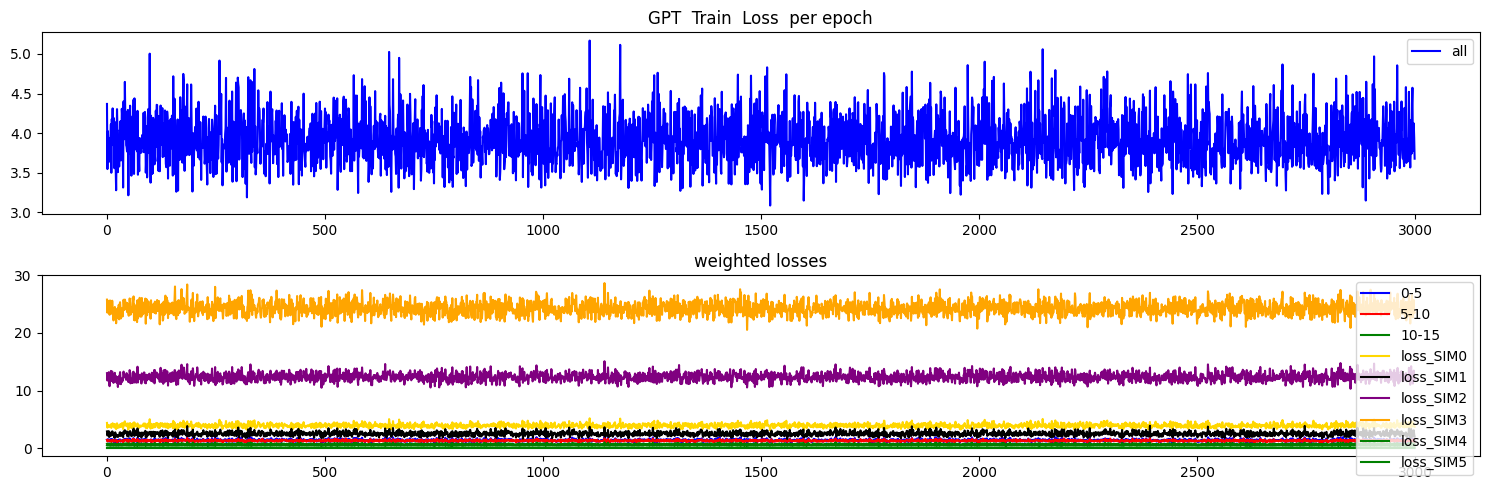

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04461118206381798
Test MSE Loss - SI only 0-5:  0.036190666258335114
Test MSE Loss - SI only 5-10:  0.07638397812843323
Test MSE Loss - SI only 10-15:  0.07152655720710754
mae, mse, rmse, mape, mspe, rse, corr
(0.159269, 0.04461118, 0.21121359, 4.3602476, 202.01349, 1.2228229)
Testing R**2 - SI only:  -0.49529592785438536
Testing R**2 - SI only:  -0.49529592785438536
Testing R**2 - All features:  0.9485334079495611
Testing R**2 - (f2) - SI full:  0.26753213347520044


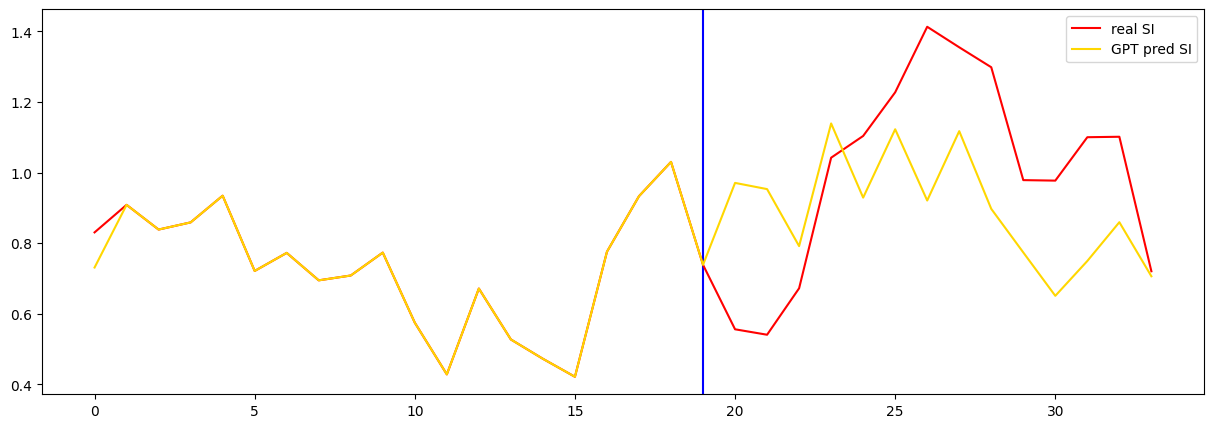

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.935992479324341
seq length of pred =  30
500 train loss =  3.8723320960998535
seq length of pred =  30
1000 train loss =  3.909792423248291
seq length of pred =  30
1500 train loss =  4.88124418258667
seq length of pred =  30
2000 train loss =  4.574713706970215
seq length of pred =  30
2500 train loss =  3.834430456161499
seq length of pred =  30


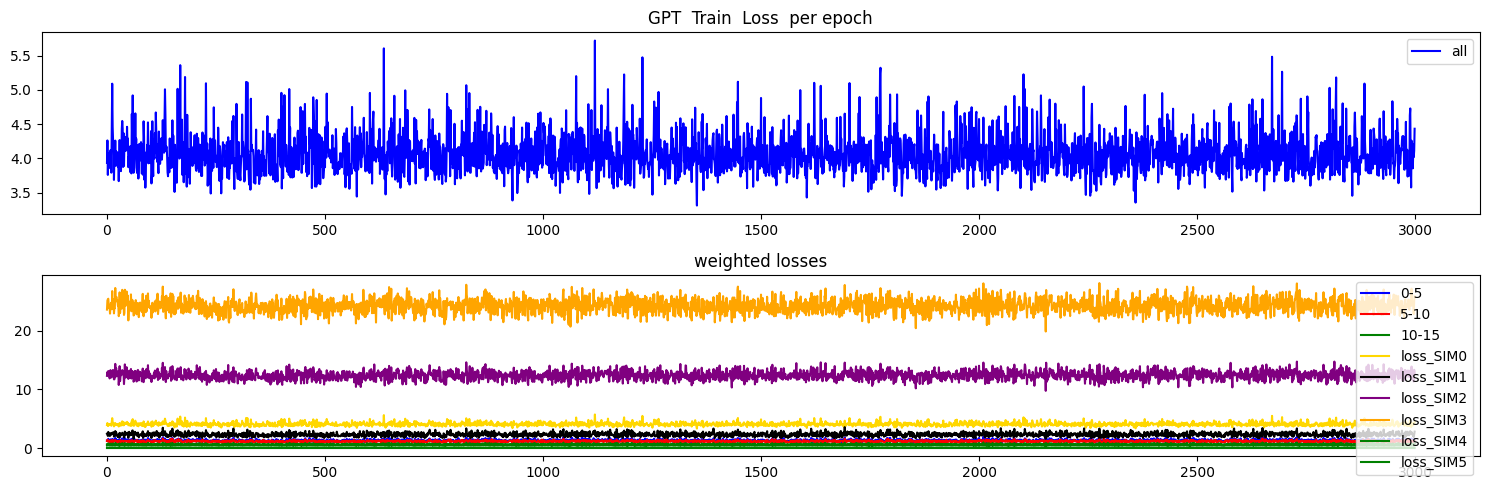

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04382508993148804
Test MSE Loss - SI only 0-5:  0.036190666258335114
Test MSE Loss - SI only 5-10:  0.07638398557901382
Test MSE Loss - SI only 10-15:  0.07152655720710754
mae, mse, rmse, mape, mspe, rse, corr
(0.1723101, 0.043825086, 0.20934442, 4.654078, 261.0505, 1.2120013)
Testing R**2 - SI only:  -0.4689472956225724
Testing R**2 - SI only:  -0.4689472956225724
Testing R**2 - All features:  0.9599959475873556
Testing R**2 - (f2) - SI full:  0.2994386806907059


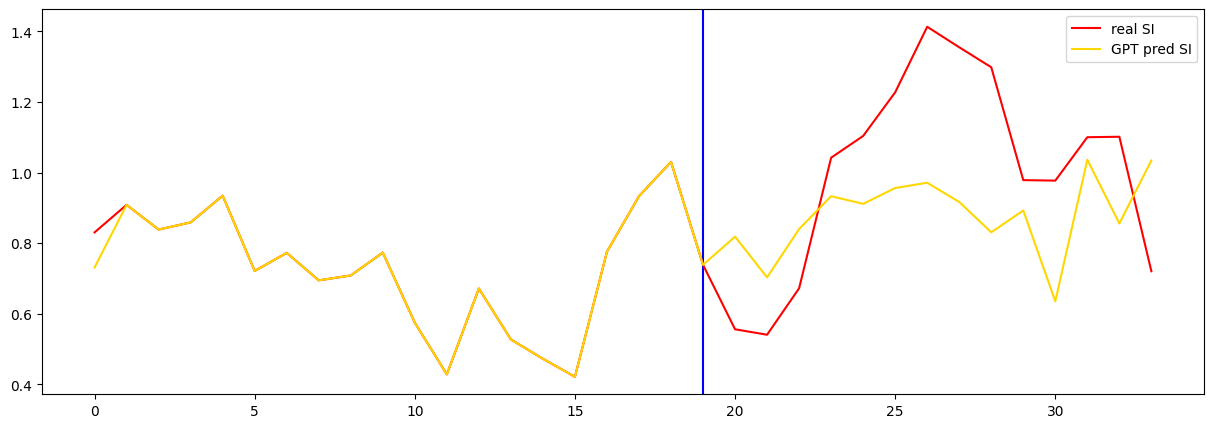

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.8112571239471436
seq length of pred =  30
500 train loss =  3.924539566040039
seq length of pred =  30
1000 train loss =  4.163145542144775
seq length of pred =  30
1500 train loss =  4.118560791015625
seq length of pred =  30
2000 train loss =  4.216305732727051
seq length of pred =  30
2500 train loss =  4.20761251449585
seq length of pred =  30


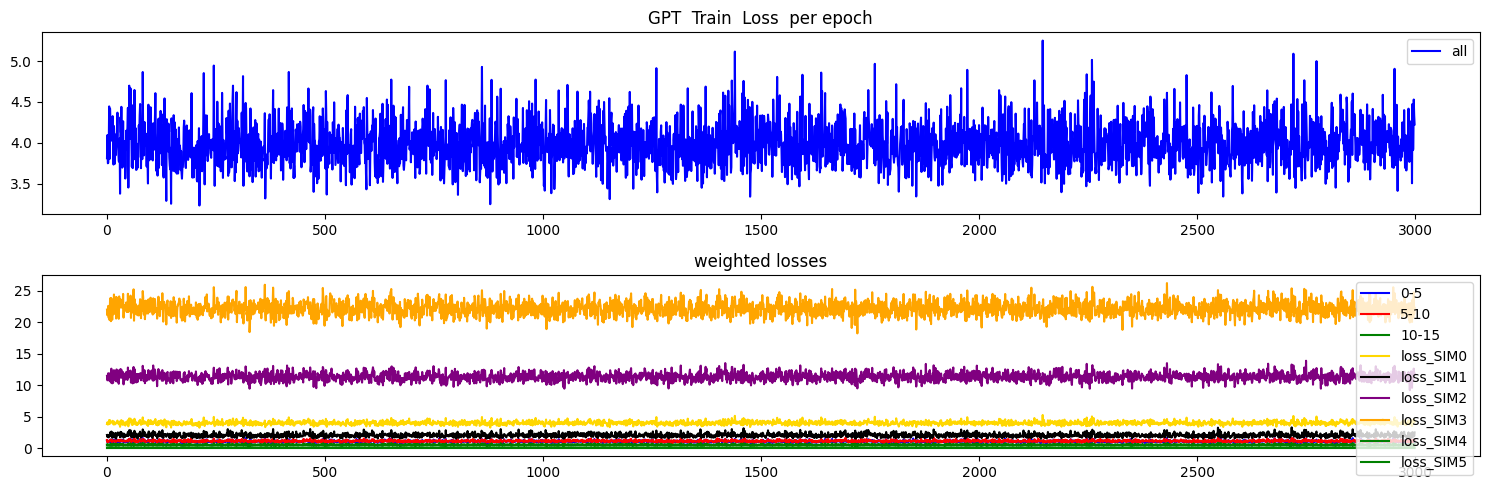

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.049274928867816925
Test MSE Loss - SI only 0-5:  0.036190666258335114
Test MSE Loss - SI only 5-10:  0.07638398557901382
Test MSE Loss - SI only 10-15:  0.07152655720710754
mae, mse, rmse, mape, mspe, rse, corr
(0.16362688, 0.04927493, 0.22197957, 3.3301666, 64.35159, 1.2851526)
Testing R**2 - SI only:  -0.6516172972710126
Testing R**2 - SI only:  -0.6516172972710126
Testing R**2 - All features:  0.9432836986050178
Testing R**2 - (f2) - SI full:  0.19322351858994535


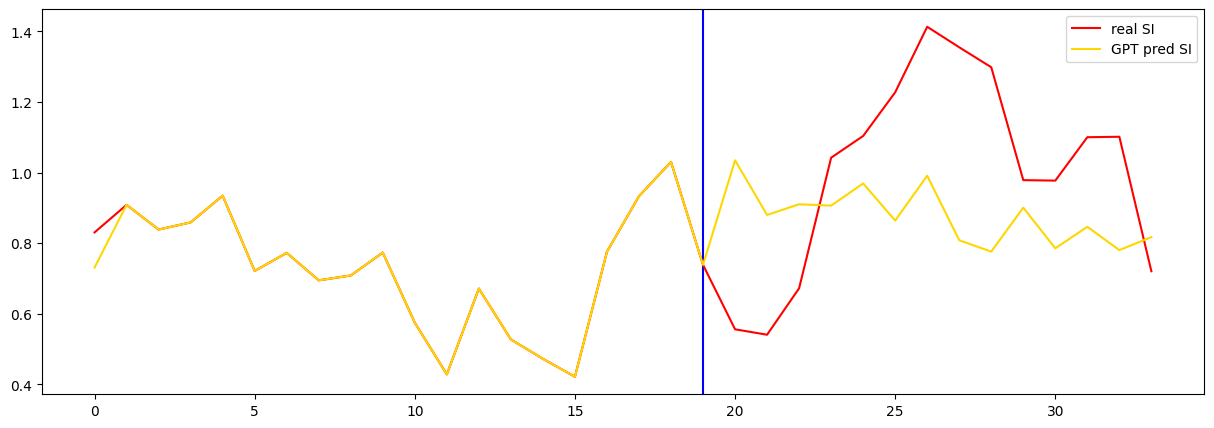

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [14]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  4.424607753753662
seq length of pred =  30
500 train loss =  4.243496894836426
seq length of pred =  30
1000 train loss =  4.681156158447266
seq length of pred =  30
1500 train loss =  4.649348735809326
seq length of pred =  30
2000 train loss =  4.779853343963623
seq length of pred =  30
2500 train loss =  4.402583122253418
seq length of pred =  30


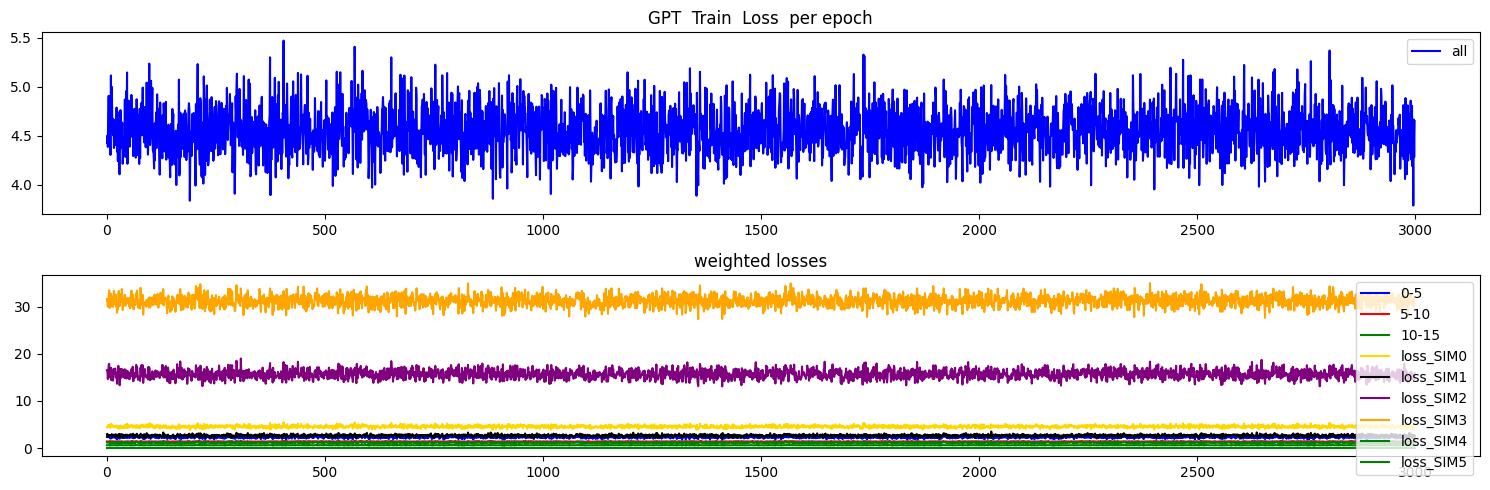

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05036585032939911
Test MSE Loss - SI only 0-5:  0.09330960363149643
Test MSE Loss - SI only 5-10:  0.01871413365006447
Test MSE Loss - SI only 10-15:  0.05882614850997925
mae, mse, rmse, mape, mspe, rse, corr
(0.18646847, 0.050365847, 0.22442336, 4.3511853, 159.01648, 1.3877444)
Testing R**2 - SI only:  -0.9258345311282852
Testing R**2 - SI only:  -0.9258345311282852
Testing R**2 - All features:  0.9809878723331862
Testing R**2 - (f2) - SI full:  -0.028537033160548564


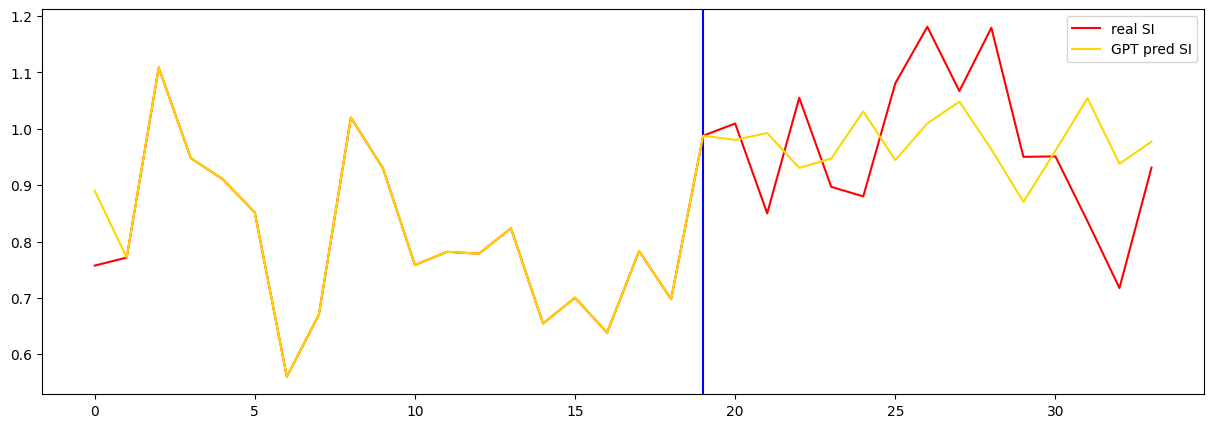

In [15]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  5.112455368041992
seq length of pred =  30
500 train loss =  5.139736175537109
seq length of pred =  30
1000 train loss =  5.472611904144287
seq length of pred =  30
1500 train loss =  5.351100921630859
seq length of pred =  30
2000 train loss =  5.542783260345459
seq length of pred =  30
2500 train loss =  5.397197723388672
seq length of pred =  30


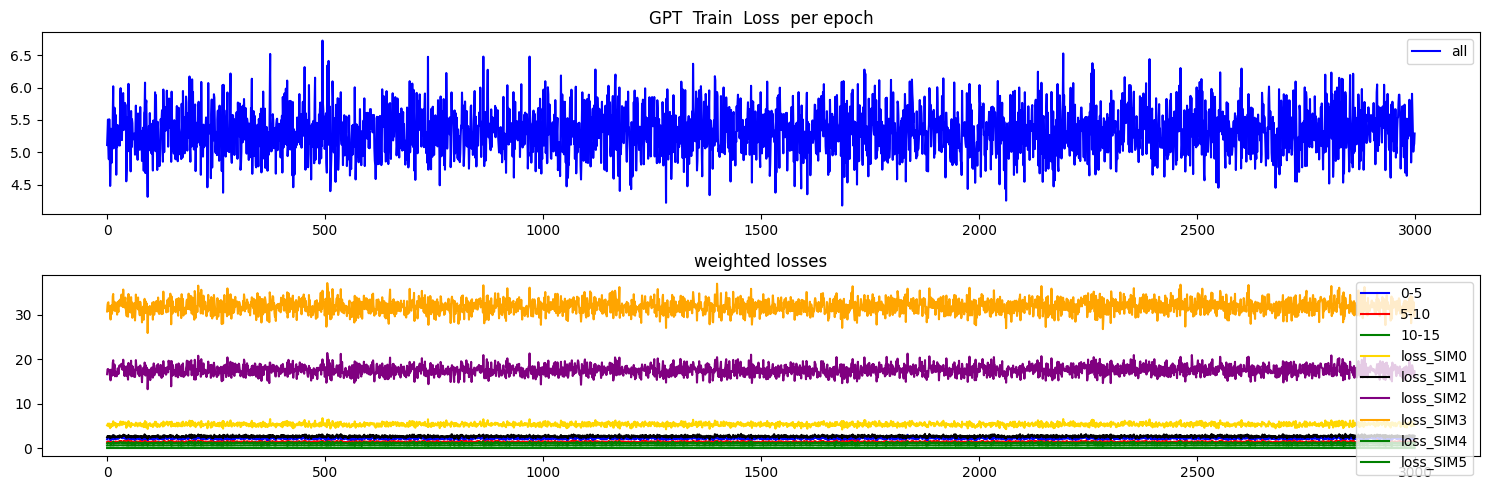

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.054028548300266266
Test MSE Loss - SI only 0-5:  0.09330961108207703
Test MSE Loss - SI only 5-10:  0.018714135512709618
Test MSE Loss - SI only 10-15:  0.05882614850997925
mae, mse, rmse, mape, mspe, rse, corr
(0.19096352, 0.05402855, 0.23244041, 3.431884, 50.876213, 1.4373187)
Testing R**2 - SI only:  -1.0658847424905091
Testing R**2 - SI only:  -1.0658847424905091
Testing R**2 - All features:  0.979267961806583
Testing R**2 - (f2) - SI full:  -0.03509628915018648


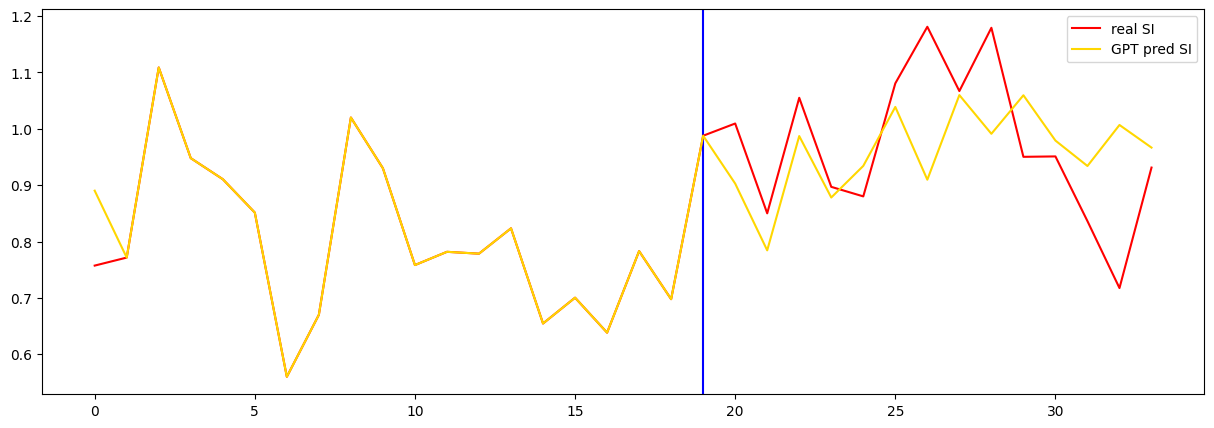

In [16]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  5.261001110076904
seq length of pred =  30
500 train loss =  5.685356140136719
seq length of pred =  30
1000 train loss =  5.9197893142700195
seq length of pred =  30
1500 train loss =  4.995913982391357
seq length of pred =  30
2000 train loss =  6.197349548339844
seq length of pred =  30
2500 train loss =  5.838476181030273
seq length of pred =  30


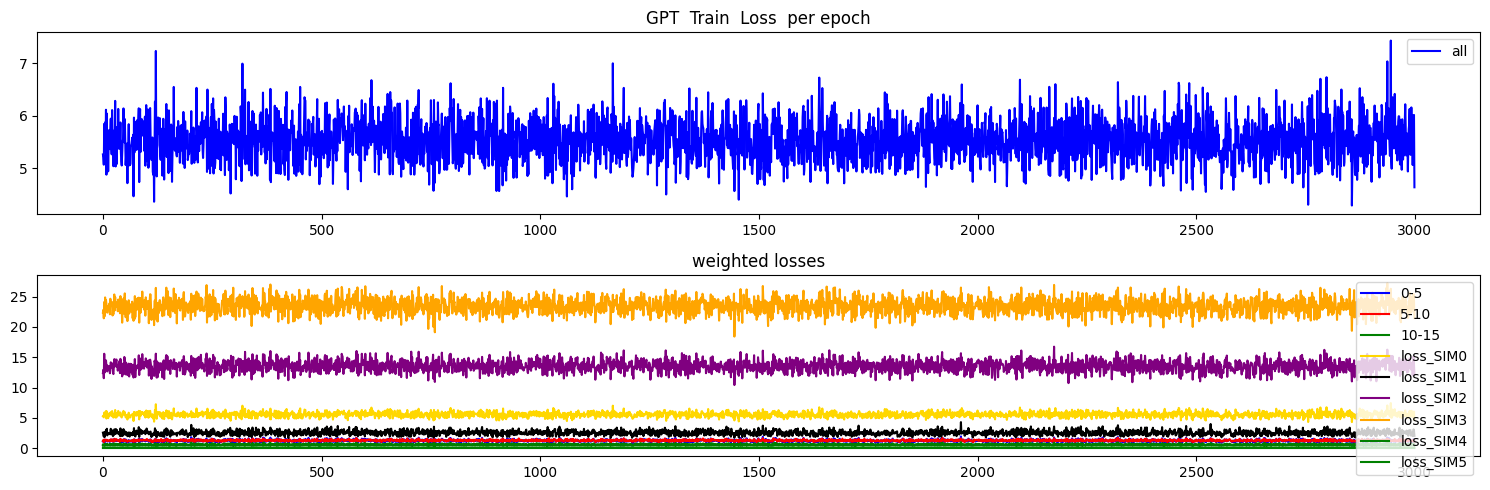

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06202300265431404
Test MSE Loss - SI only 0-5:  0.09330961108207703
Test MSE Loss - SI only 5-10:  0.018714135512709618
Test MSE Loss - SI only 10-15:  0.05882614850997925
mae, mse, rmse, mape, mspe, rse, corr
(0.21434197, 0.062023003, 0.24904418, 4.7090874, 174.6429, 1.5399897)
Testing R**2 - SI only:  -1.3715678901424946
Testing R**2 - SI only:  -1.3715678901424946
Testing R**2 - All features:  0.9724812555883215
Testing R**2 - (f2) - SI full:  -0.08533625845572557


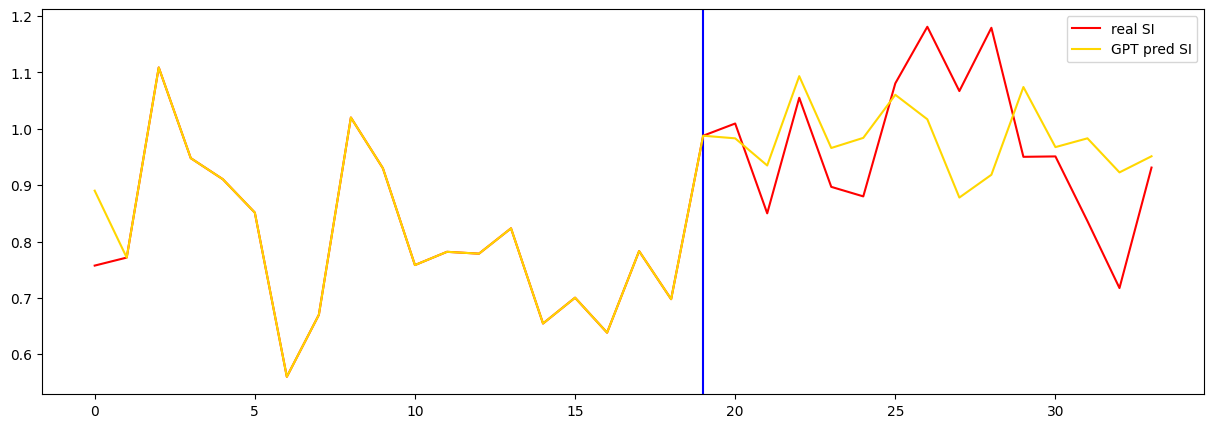

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  5.967789173126221
seq length of pred =  30
500 train loss =  5.199640274047852
seq length of pred =  30
1000 train loss =  5.945167064666748
seq length of pred =  30
1500 train loss =  6.2599639892578125
seq length of pred =  30
2000 train loss =  4.481170177459717
seq length of pred =  30
2500 train loss =  5.853161811828613
seq length of pred =  30


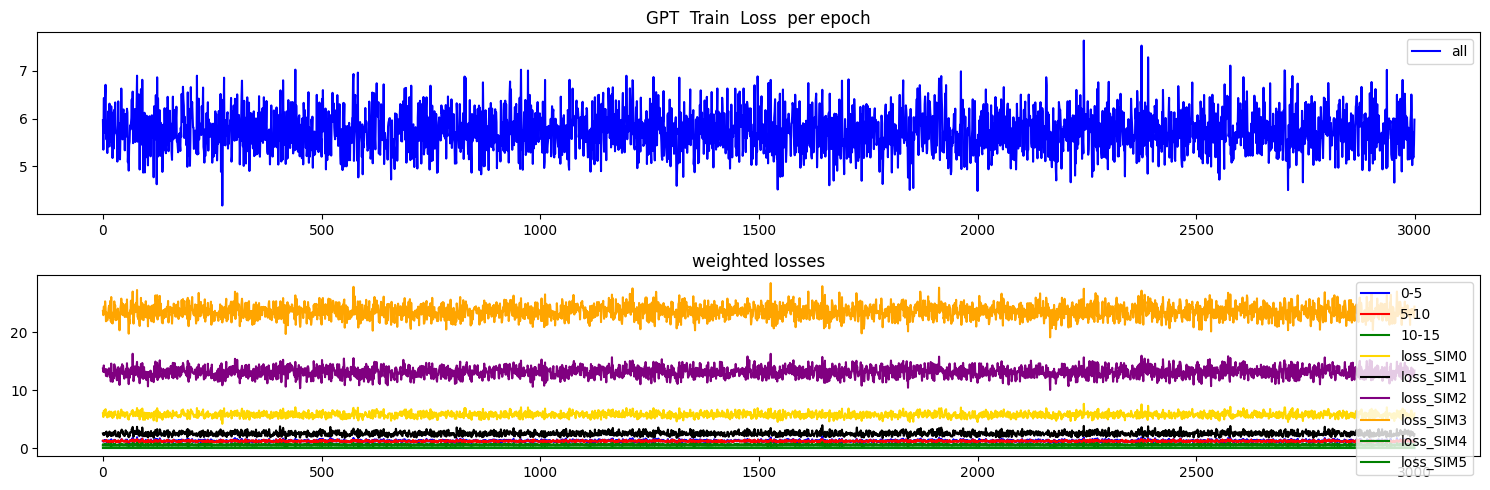

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.049462080001831055
Test MSE Loss - SI only 0-5:  0.09330961108207703
Test MSE Loss - SI only 5-10:  0.018714135512709618
Test MSE Loss - SI only 10-15:  0.05882614850997925
mae, mse, rmse, mape, mspe, rse, corr
(0.18331213, 0.04946208, 0.22240072, 6.405717, 606.56116, 1.375237)
Testing R**2 - SI only:  -0.891276934920106
Testing R**2 - SI only:  -0.891276934920106
Testing R**2 - All features:  0.9822713824637936
Testing R**2 - (f2) - SI full:  -0.4701836034507052


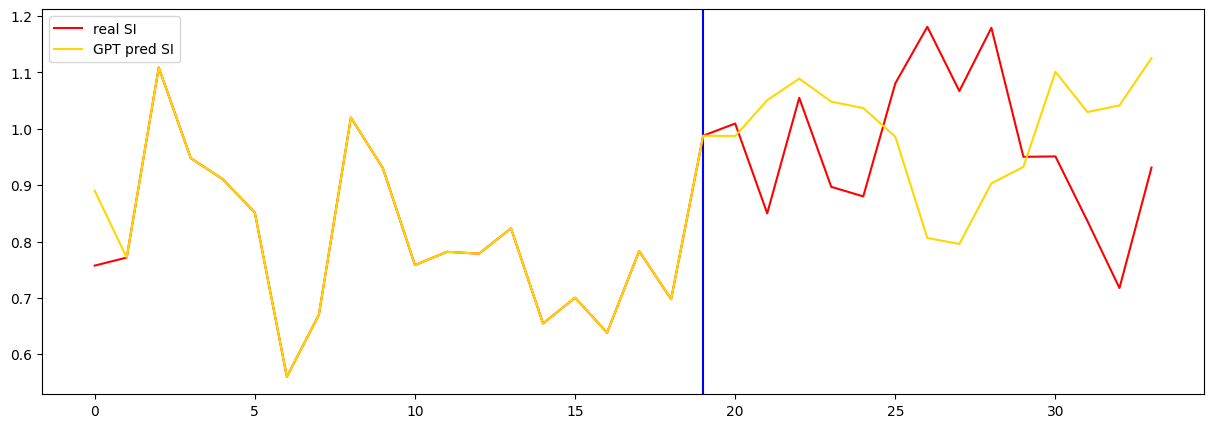

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [19]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  4.290183067321777
seq length of pred =  30
500 train loss =  4.282796382904053
seq length of pred =  30
1000 train loss =  4.4842000007629395
seq length of pred =  30
1500 train loss =  4.447347164154053
seq length of pred =  30
2000 train loss =  4.94512939453125
seq length of pred =  30
2500 train loss =  5.365481376647949
seq length of pred =  30


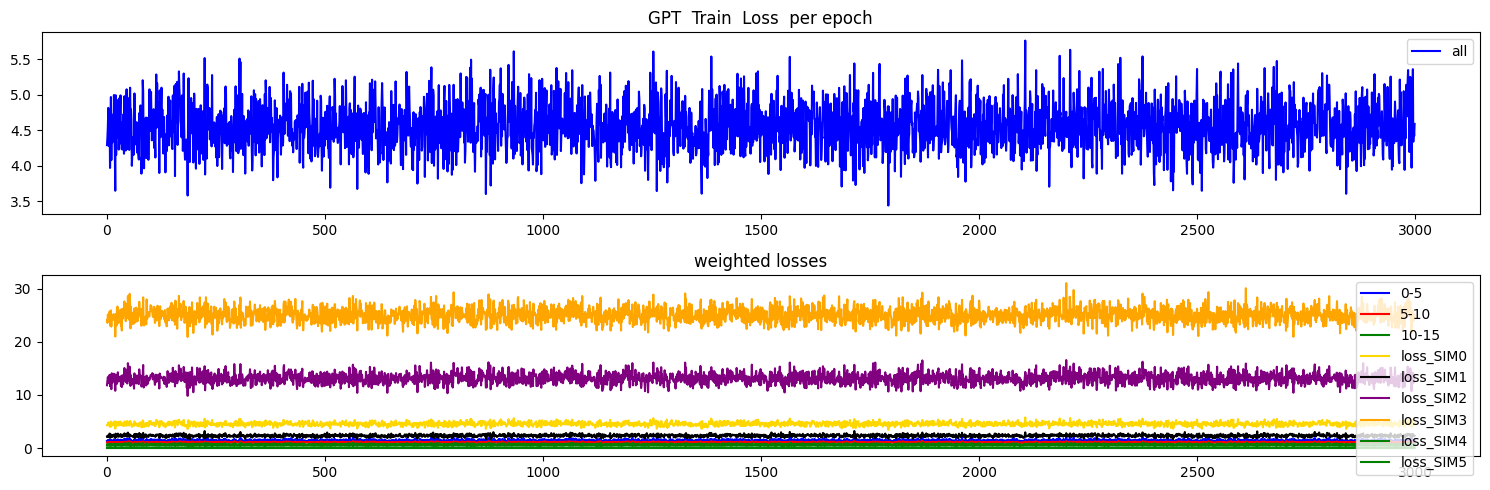

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04417231306433678
Test MSE Loss - SI only 0-5:  0.008123273961246014
Test MSE Loss - SI only 5-10:  0.06299386918544769
Test MSE Loss - SI only 10-15:  0.029942193999886513
mae, mse, rmse, mape, mspe, rse, corr
(0.16339453, 0.04417231, 0.2101721, 1.6490602, 4.427109, 1.3178469)
Testing R**2 - SI only:  -0.7367208394049496
Testing R**2 - SI only:  -0.7367208394049496
Testing R**2 - All features:  0.9858221116567282
Testing R**2 - (f2) - SI full:  -0.21102316744925798


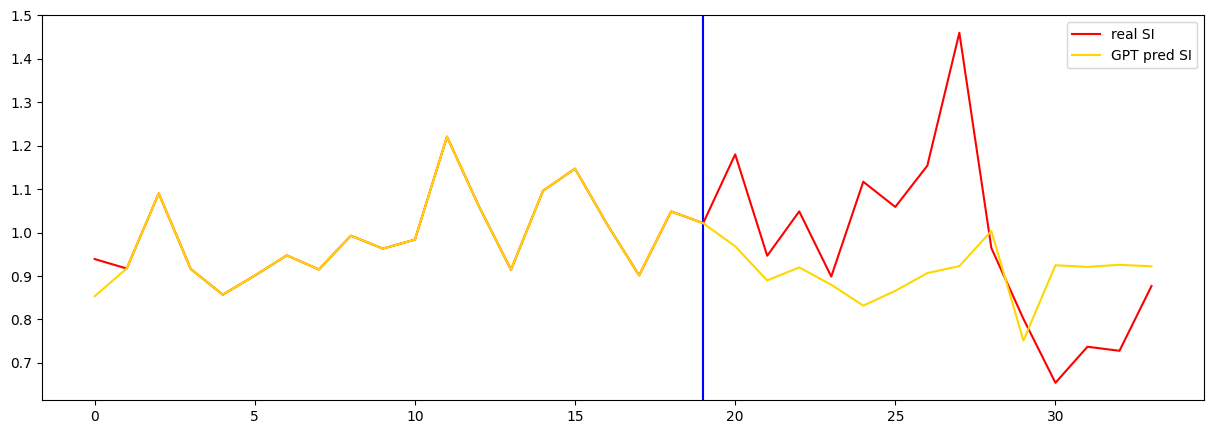

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.8834097385406494
seq length of pred =  30
500 train loss =  4.290441513061523
seq length of pred =  30
1000 train loss =  3.7849180698394775
seq length of pred =  30
1500 train loss =  3.9148898124694824
seq length of pred =  30
2000 train loss =  3.987227201461792
seq length of pred =  30
2500 train loss =  3.755873441696167
seq length of pred =  30


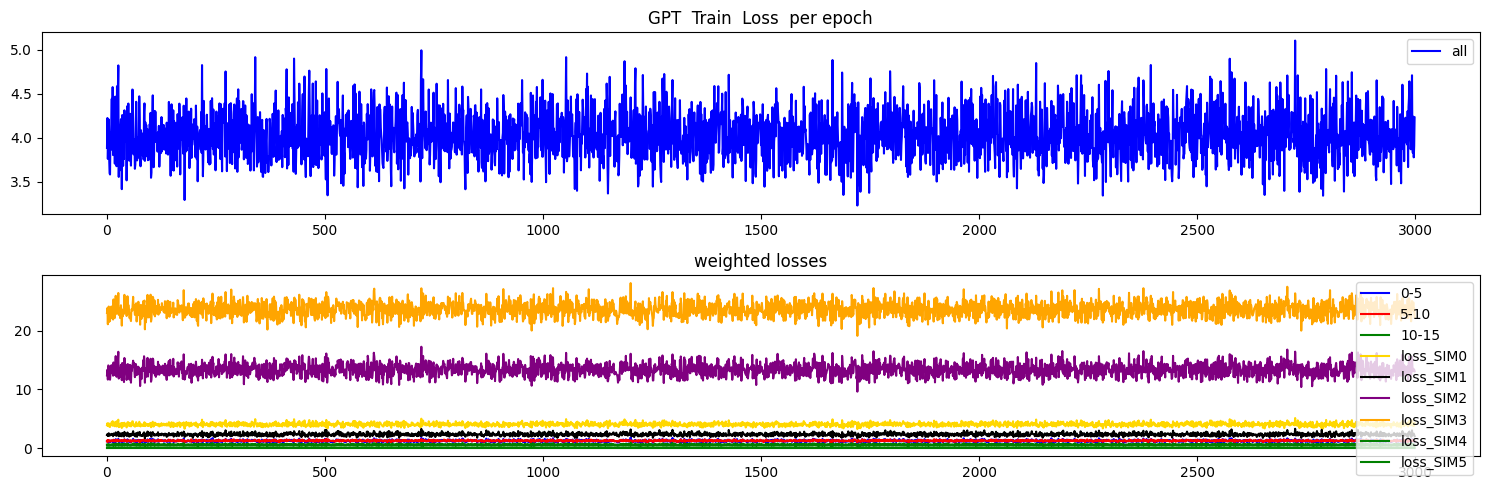

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0351087749004364
Test MSE Loss - SI only 0-5:  0.008123273961246014
Test MSE Loss - SI only 5-10:  0.06299386918544769
Test MSE Loss - SI only 10-15:  0.029942193999886513
mae, mse, rmse, mape, mspe, rse, corr
(0.1536225, 0.035108775, 0.18737336, 2.0580866, 15.5053, 1.1748916)
Testing R**2 - SI only:  -0.3803701317216954
Testing R**2 - SI only:  -0.3803701317216954
Testing R**2 - All features:  0.9781657786745415
Testing R**2 - (f2) - SI full:  -0.8647220544362848


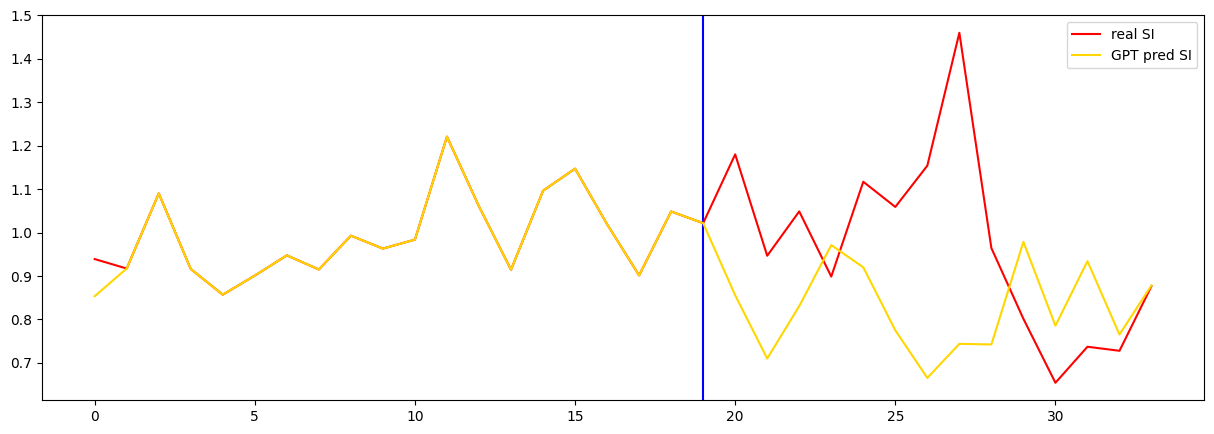

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.7827603816986084
seq length of pred =  30
500 train loss =  4.641018390655518
seq length of pred =  30
1000 train loss =  4.336626052856445
seq length of pred =  30
1500 train loss =  4.408940315246582
seq length of pred =  30
2000 train loss =  4.41450309753418
seq length of pred =  30
2500 train loss =  3.927048921585083
seq length of pred =  30


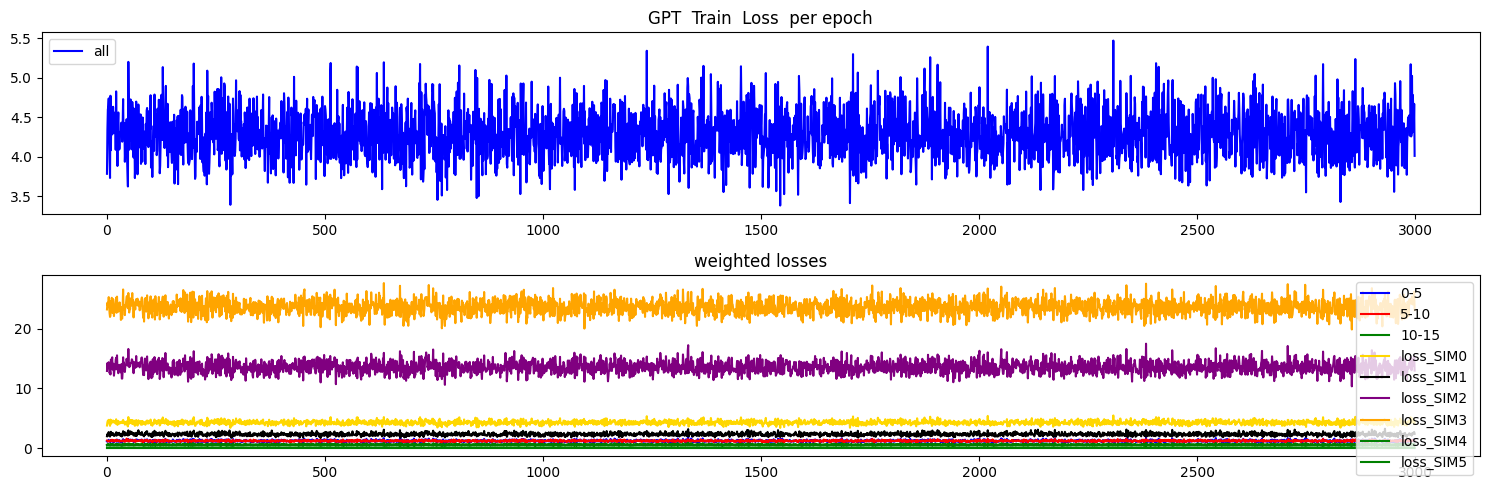

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04910735413432121
Test MSE Loss - SI only 0-5:  0.008123273029923439
Test MSE Loss - SI only 5-10:  0.06299386918544769
Test MSE Loss - SI only 10-15:  0.029942193999886513
mae, mse, rmse, mape, mspe, rse, corr
(0.18921462, 0.04910735, 0.22160178, 2.4525323, 20.160032, 1.3895149)
Testing R**2 - SI only:  -0.9307517589650367
Testing R**2 - SI only:  -0.9307517589650367
Testing R**2 - All features:  0.9795819181055067
Testing R**2 - (f2) - SI full:  -0.3284475299125085


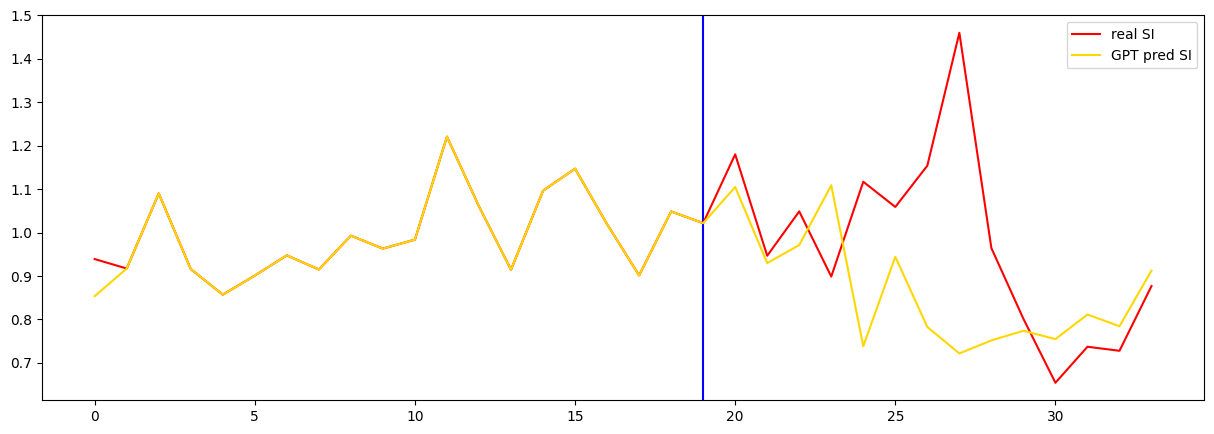

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.9133756160736084
seq length of pred =  30
500 train loss =  3.8227877616882324
seq length of pred =  30
1000 train loss =  3.8177919387817383
seq length of pred =  30
1500 train loss =  3.8457117080688477
seq length of pred =  30
2000 train loss =  3.7459778785705566
seq length of pred =  30
2500 train loss =  4.1162919998168945
seq length of pred =  30


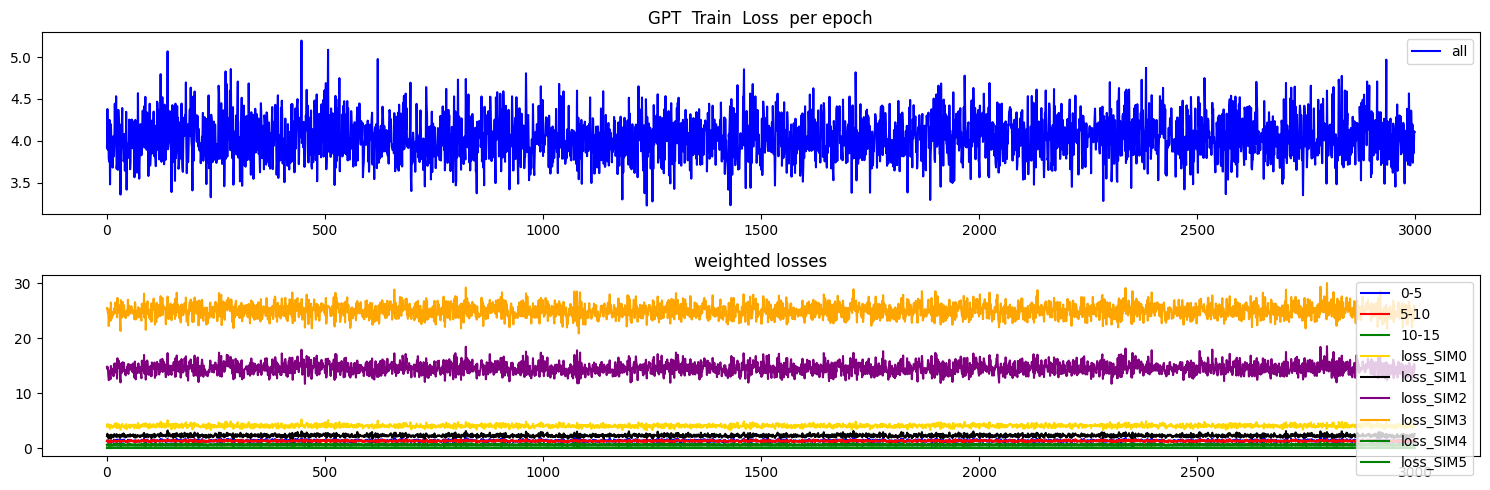

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.042341530323028564
Test MSE Loss - SI only 0-5:  0.008123273961246014
Test MSE Loss - SI only 5-10:  0.06299386918544769
Test MSE Loss - SI only 10-15:  0.029942190274596214
mae, mse, rmse, mape, mspe, rse, corr
(0.16644476, 0.042341527, 0.20577057, 1.8191072, 5.28307, 1.290248)
Testing R**2 - SI only:  -0.6647400968164385
Testing R**2 - SI only:  -0.6647400968164385
Testing R**2 - All features:  0.9648883386747223
Testing R**2 - (f2) - SI full:  -0.3339321681452576


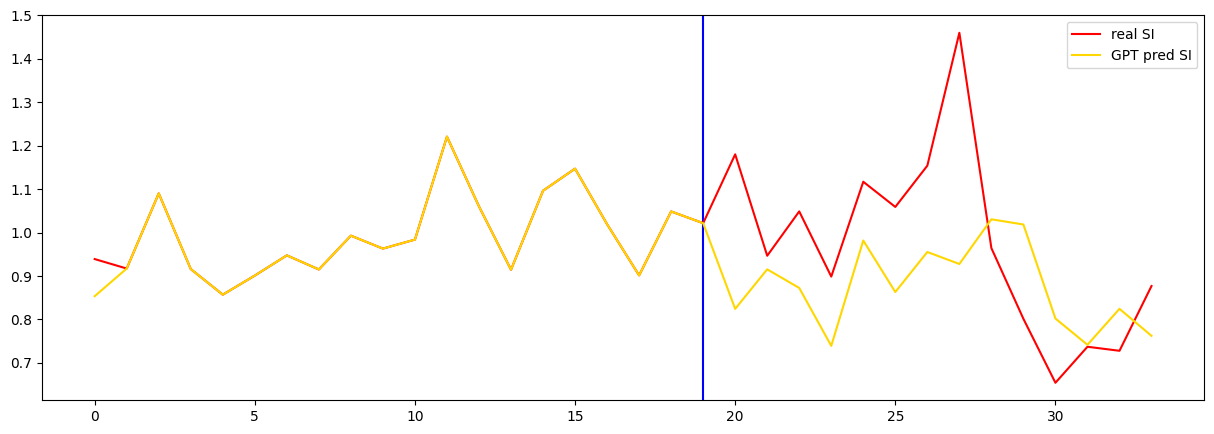

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  3.9782869815826416
seq length of pred =  30
500 train loss =  4.52108907699585
seq length of pred =  30
1000 train loss =  3.982295036315918
seq length of pred =  30
1500 train loss =  4.069692134857178
seq length of pred =  30
2000 train loss =  4.102745532989502
seq length of pred =  30
2500 train loss =  3.343473434448242
seq length of pred =  30


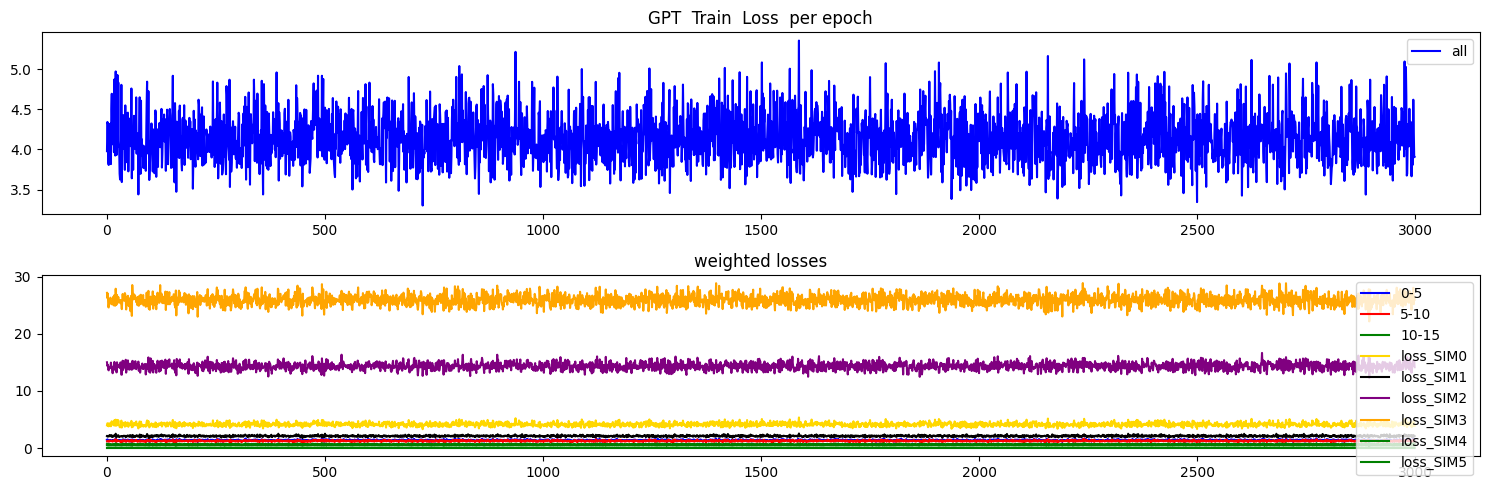

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03166947141289711
Test MSE Loss - SI only 0-5:  0.046122096478939056
Test MSE Loss - SI only 5-10:  0.01653994247317314
Test MSE Loss - SI only 10-15:  0.015332010574638844
mae, mse, rmse, mape, mspe, rse, corr
(0.1478406, 0.031669475, 0.17795919, 10.764424, 2267.0374, 1.3624477)
Testing R**2 - SI only:  -0.8562635301531614
Testing R**2 - SI only:  -0.8562635301531614
Testing R**2 - All features:  0.9942007357136116
Testing R**2 - (f2) - SI full:  -2.9406369378253907


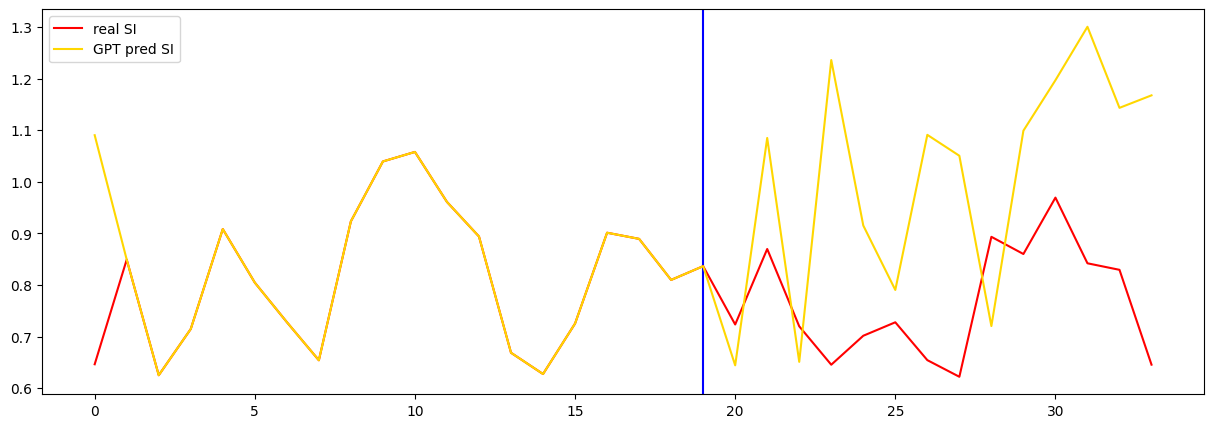

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.9969253540039062
seq length of pred =  30
500 train loss =  3.940070629119873
seq length of pred =  30
1000 train loss =  3.9471702575683594
seq length of pred =  30
1500 train loss =  4.094356060028076
seq length of pred =  30
2000 train loss =  4.519253730773926
seq length of pred =  30
2500 train loss =  4.148404598236084
seq length of pred =  30


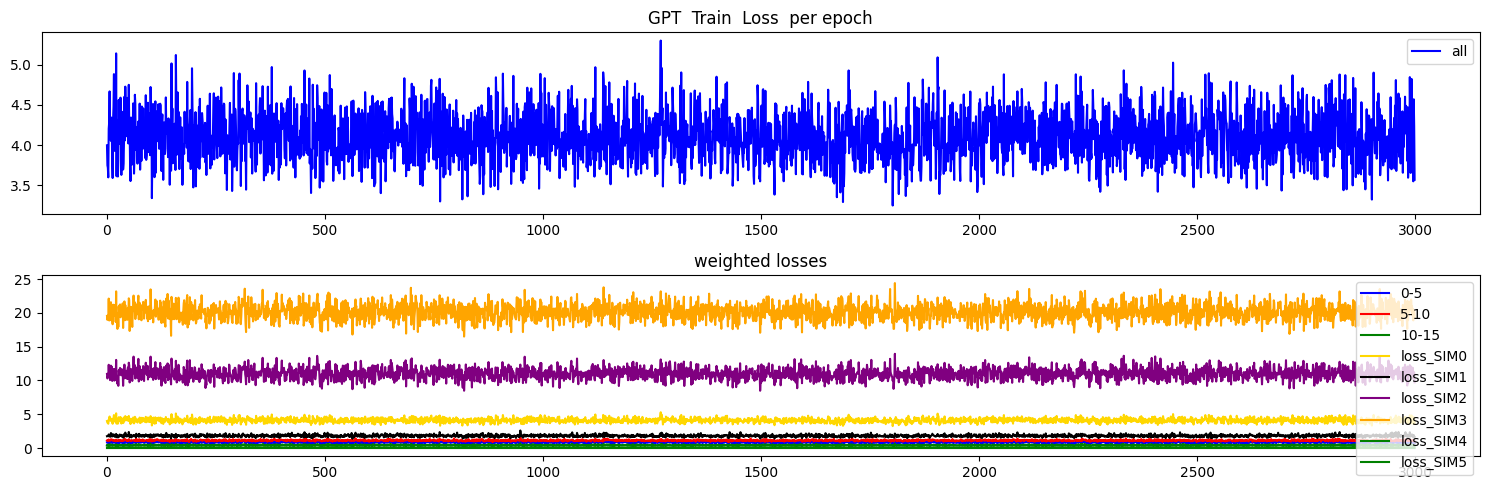

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03025089018046856
Test MSE Loss - SI only 0-5:  0.046122096478939056
Test MSE Loss - SI only 5-10:  0.01653994247317314
Test MSE Loss - SI only 10-15:  0.015332010574638844
mae, mse, rmse, mape, mspe, rse, corr
(0.14170757, 0.03025089, 0.17392783, 3.0935433, 34.326347, 1.3315837)
Testing R**2 - SI only:  -0.7731149691037393
Testing R**2 - SI only:  -0.7731149691037393
Testing R**2 - All features:  0.9921672445297341
Testing R**2 - (f2) - SI full:  -2.115708150671963


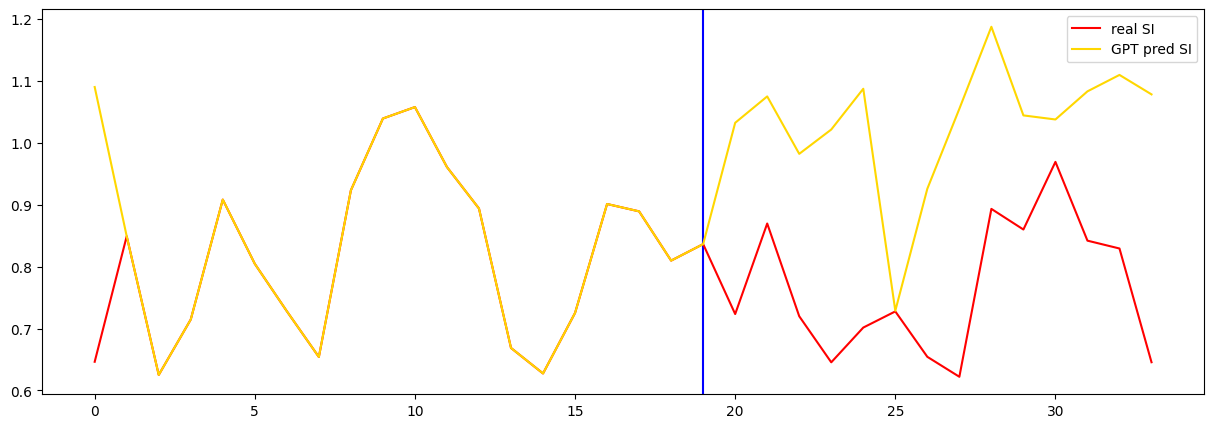

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  4.801342487335205
seq length of pred =  30
500 train loss =  4.6256866455078125
seq length of pred =  30
1000 train loss =  4.673404216766357
seq length of pred =  30
1500 train loss =  4.082212924957275
seq length of pred =  30
2000 train loss =  4.261629104614258
seq length of pred =  30
2500 train loss =  4.405848026275635
seq length of pred =  30


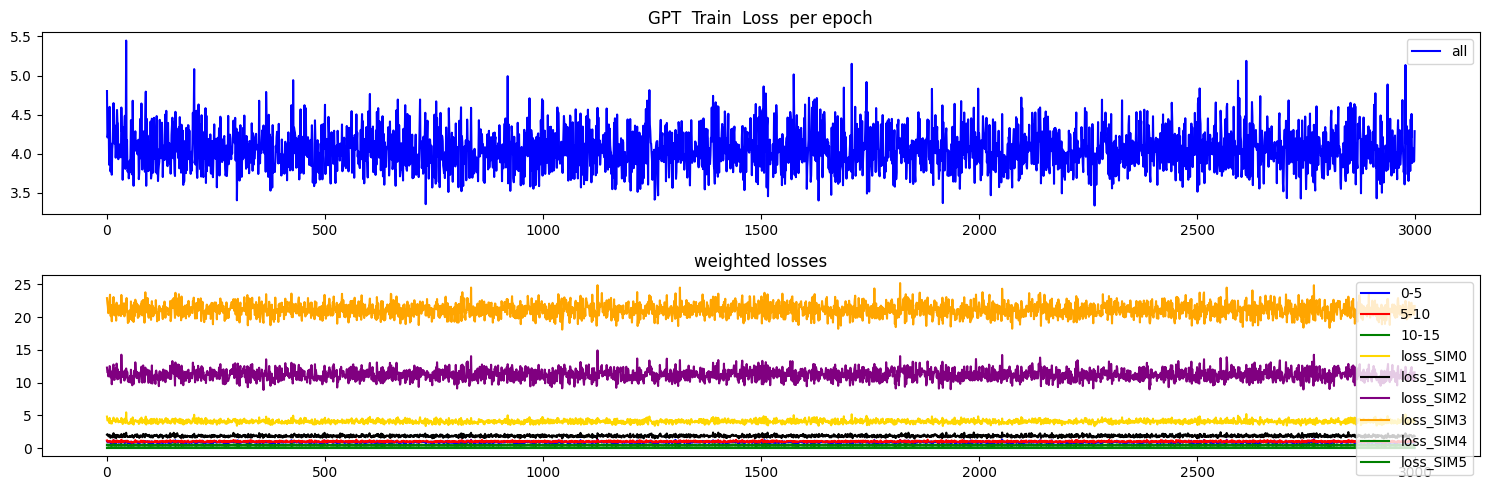

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03256484493613243
Test MSE Loss - SI only 0-5:  0.046122096478939056
Test MSE Loss - SI only 5-10:  0.01653994247317314
Test MSE Loss - SI only 10-15:  0.015332010574638844
mae, mse, rmse, mape, mspe, rse, corr
(0.14782055, 0.032564845, 0.18045732, 5.338403, 324.04453, 1.3815732)
Testing R**2 - SI only:  -0.9087442141575384
Testing R**2 - SI only:  -0.9087442141575384
Testing R**2 - All features:  0.9842135541858451
Testing R**2 - (f2) - SI full:  -1.5208100720256428


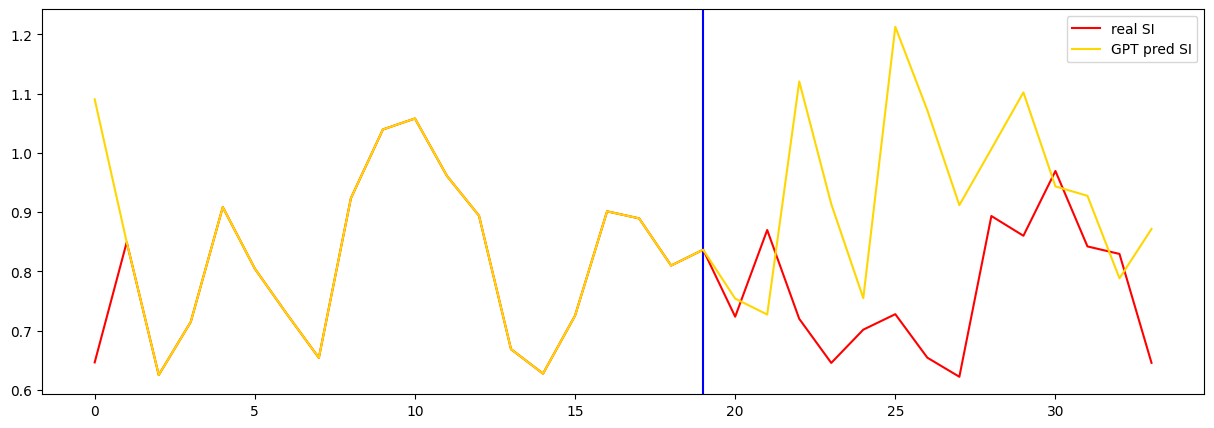

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.4722487926483154
seq length of pred =  30
500 train loss =  3.35697078704834
seq length of pred =  30
1000 train loss =  3.5077855587005615
seq length of pred =  30
1500 train loss =  3.428986072540283
seq length of pred =  30
2000 train loss =  3.5584285259246826
seq length of pred =  30
2500 train loss =  3.5151445865631104
seq length of pred =  30


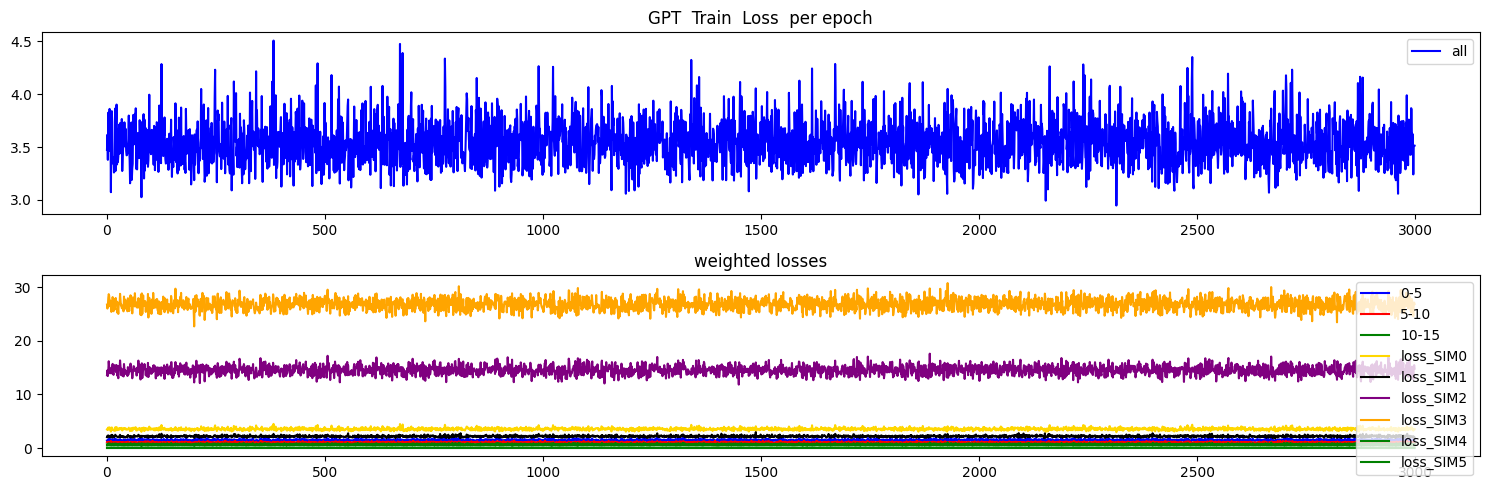

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.023053260520100594
Test MSE Loss - SI only 0-5:  0.046122096478939056
Test MSE Loss - SI only 5-10:  0.01653994247317314
Test MSE Loss - SI only 10-15:  0.015332010574638844
mae, mse, rmse, mape, mspe, rse, corr
(0.1240414, 0.02305326, 0.151833, 8.564552, 1407.8448, 1.1624267)
Testing R**2 - SI only:  -0.3512356077747265
Testing R**2 - SI only:  -0.3512356077747265
Testing R**2 - All features:  0.9878969375747493
Testing R**2 - (f2) - SI full:  -1.2557866808829559


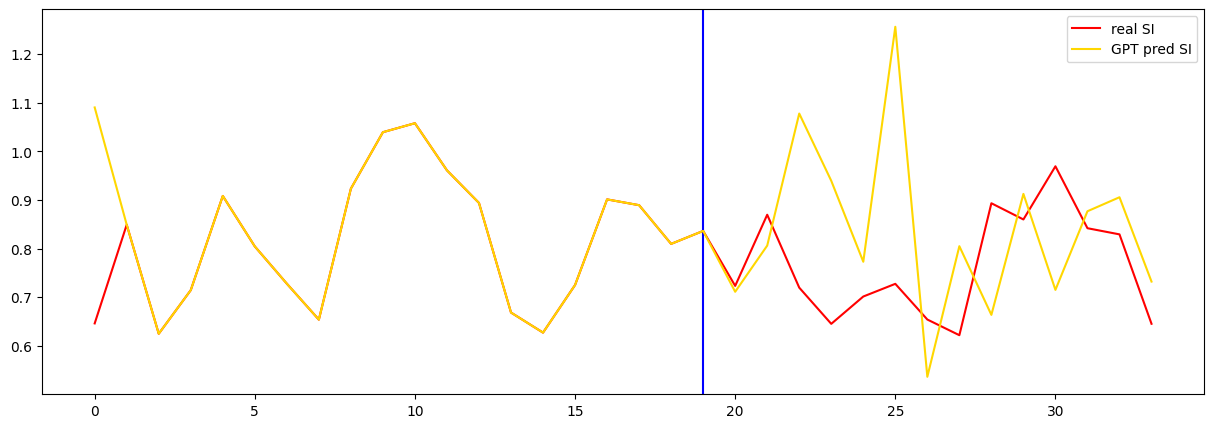

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  4.231154918670654
seq length of pred =  30
500 train loss =  4.835371971130371
seq length of pred =  30
1000 train loss =  4.190903663635254
seq length of pred =  30
1500 train loss =  4.960656642913818
seq length of pred =  30
2000 train loss =  4.482741832733154
seq length of pred =  30
2500 train loss =  4.501639366149902
seq length of pred =  30


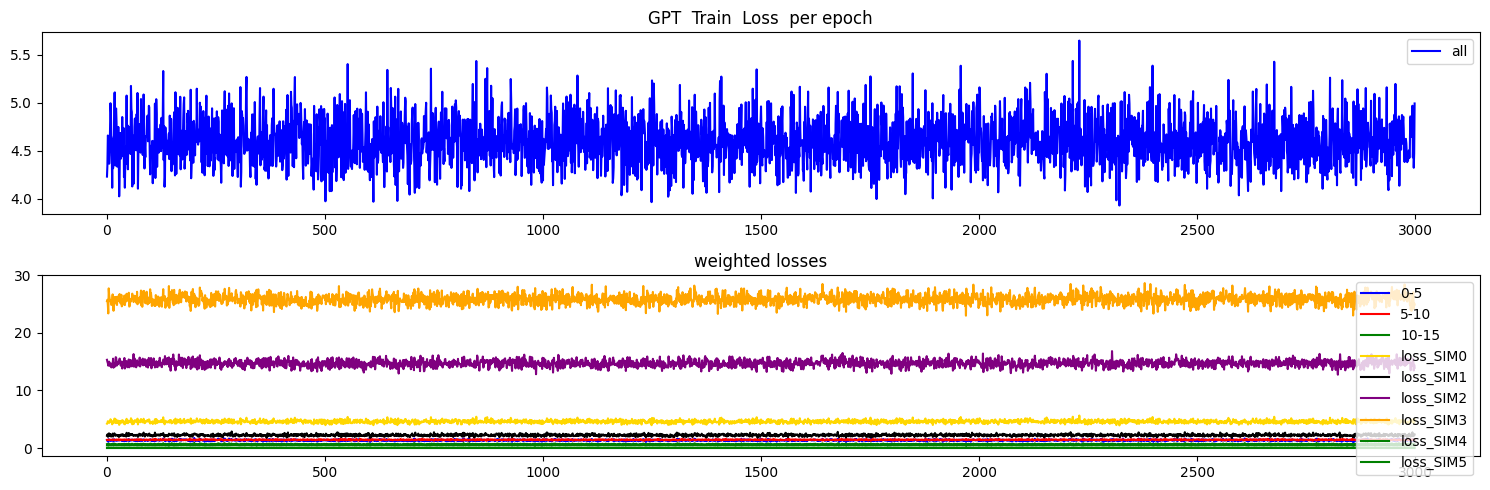

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.22898274660110474
Test MSE Loss - SI only 0-5:  0.03873569145798683
Test MSE Loss - SI only 5-10:  0.12780821323394775
Test MSE Loss - SI only 10-15:  1.1336236000061035
mae, mse, rmse, mape, mspe, rse, corr
(0.30719215, 0.22898275, 0.4785214, 2.291919, 13.09858, 1.470613)
Testing R**2 - SI only:  -1.1627025311991126
Testing R**2 - SI only:  -1.1627025311991126
Testing R**2 - All features:  0.7396305176743176
Testing R**2 - (f2) - SI full:  -0.03941084010729812


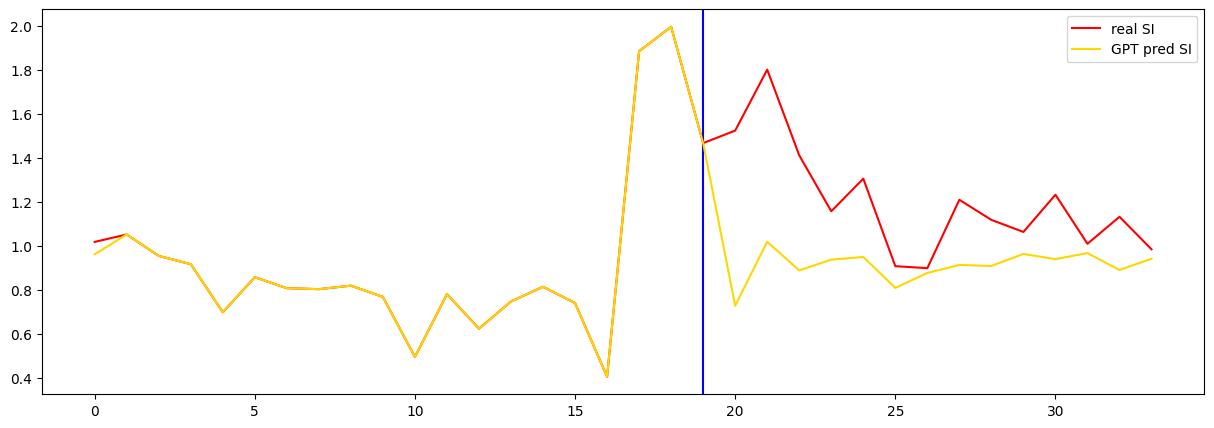

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.8715879917144775
seq length of pred =  30
500 train loss =  3.790408134460449
seq length of pred =  30
1000 train loss =  3.958676815032959
seq length of pred =  30
1500 train loss =  3.52337908744812
seq length of pred =  30
2000 train loss =  4.223425388336182
seq length of pred =  30
2500 train loss =  3.9133944511413574
seq length of pred =  30


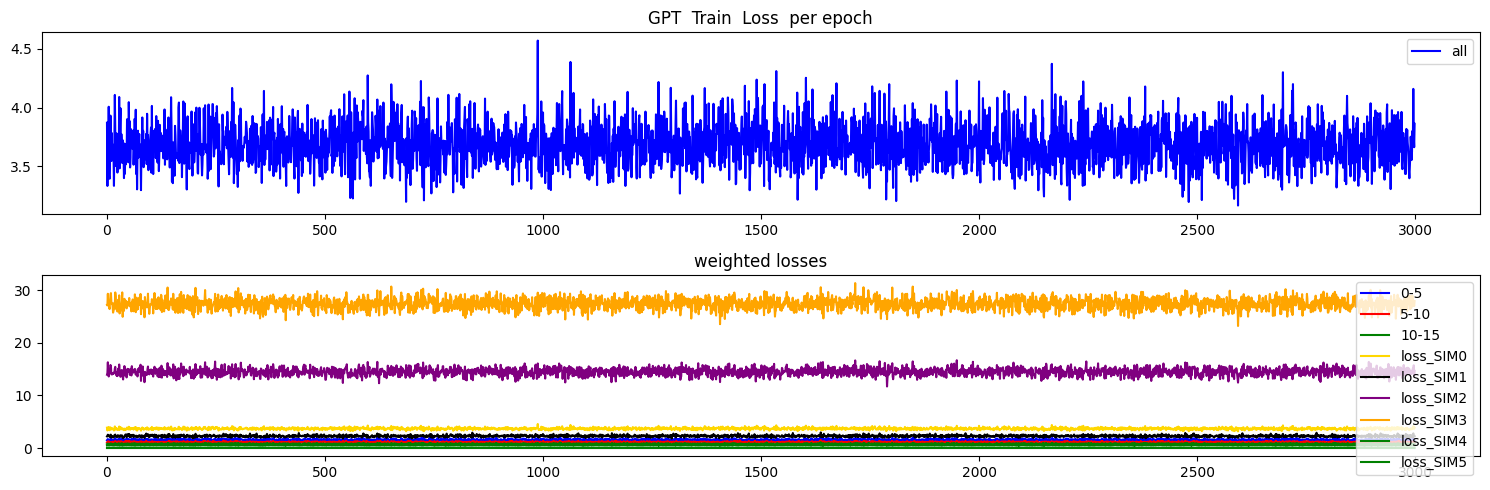

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.22977805137634277
Test MSE Loss - SI only 0-5:  0.03873569145798683
Test MSE Loss - SI only 5-10:  0.12780821323394775
Test MSE Loss - SI only 10-15:  1.1336236000061035
mae, mse, rmse, mape, mspe, rse, corr
(0.31903747, 0.22977805, 0.4793517, 2.8992345, 23.13991, 1.4731647)
Testing R**2 - SI only:  -1.1702140705735768
Testing R**2 - SI only:  -1.1702140705735768
Testing R**2 - All features:  0.7378400309971783
Testing R**2 - (f2) - SI full:  -0.07528239295633554


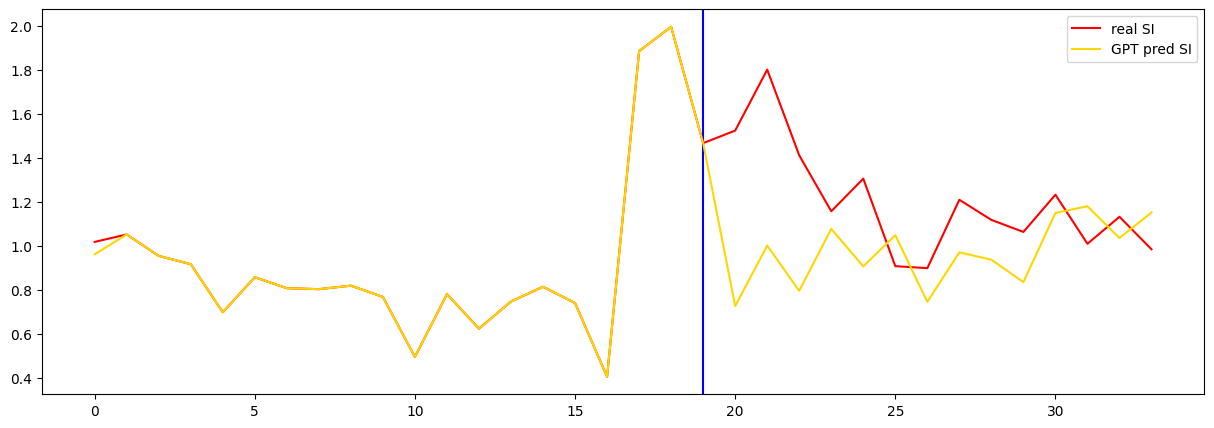

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.36854887008667
seq length of pred =  30
500 train loss =  3.780379295349121
seq length of pred =  30
1000 train loss =  3.7342476844787598
seq length of pred =  30
1500 train loss =  3.643613815307617
seq length of pred =  30
2000 train loss =  3.6501452922821045
seq length of pred =  30
2500 train loss =  3.7881126403808594
seq length of pred =  30


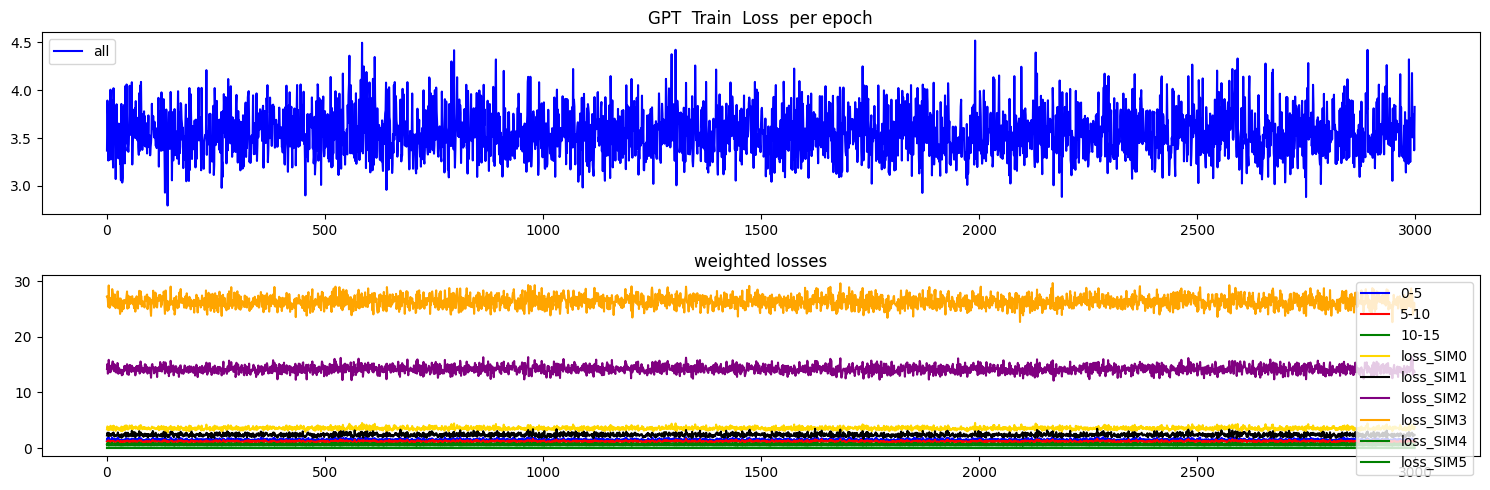

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.23105666041374207
Test MSE Loss - SI only 0-5:  0.03873569145798683
Test MSE Loss - SI only 5-10:  0.12780821323394775
Test MSE Loss - SI only 10-15:  1.1336236000061035
mae, mse, rmse, mape, mspe, rse, corr
(0.31885093, 0.23105666, 0.48068354, 2.7258036, 18.681192, 1.4772578)
Testing R**2 - SI only:  -1.1822903855301128
Testing R**2 - SI only:  -1.1822903855301128
Testing R**2 - All features:  0.7320350034706564
Testing R**2 - (f2) - SI full:  -0.08697869016770698


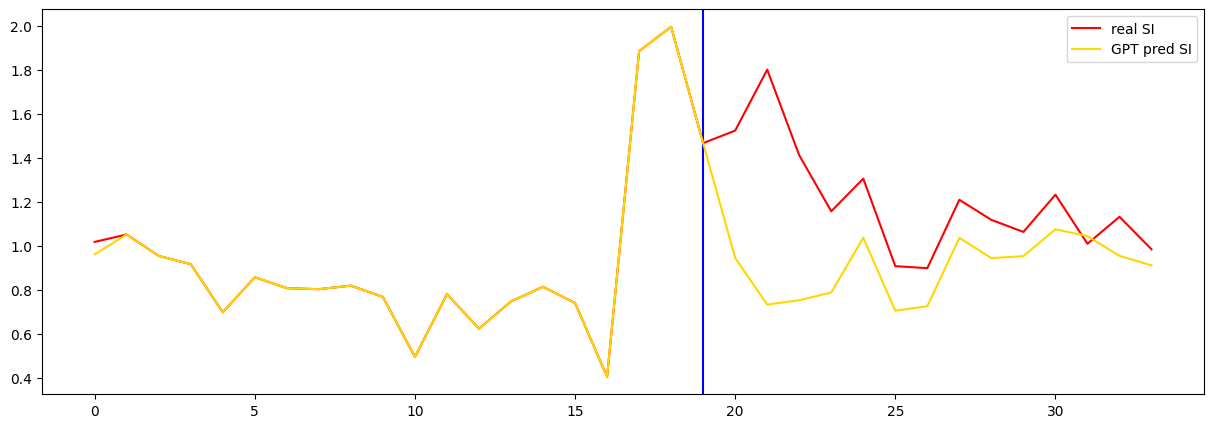

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  3.2289226055145264
seq length of pred =  30
500 train loss =  3.4839329719543457
seq length of pred =  30
1000 train loss =  3.1045050621032715
seq length of pred =  30
1500 train loss =  3.152468681335449
seq length of pred =  30
2000 train loss =  3.226832628250122
seq length of pred =  30
2500 train loss =  3.3044416904449463
seq length of pred =  30


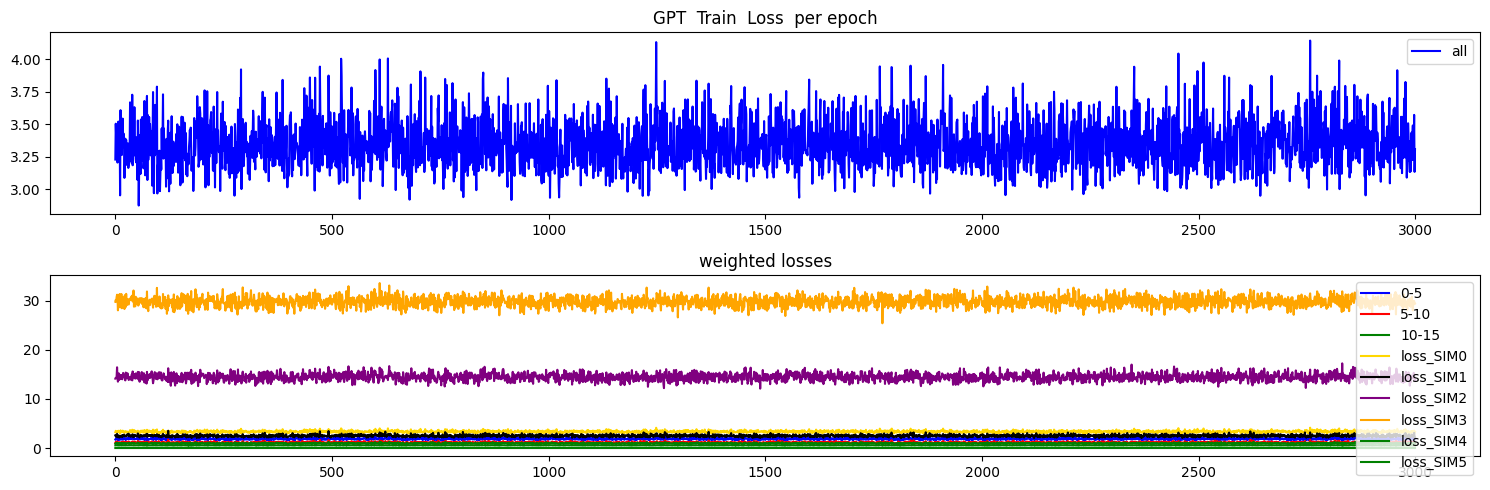

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.2244737297296524
Test MSE Loss - SI only 0-5:  0.03873569145798683
Test MSE Loss - SI only 5-10:  0.12780821323394775
Test MSE Loss - SI only 10-15:  1.1336236000061035
mae, mse, rmse, mape, mspe, rse, corr
(0.29741353, 0.22447374, 0.4737866, 2.3003147, 13.303695, 1.4560618)
Testing R**2 - SI only:  -1.1201158196979355
Testing R**2 - SI only:  -1.1201158196979355
Testing R**2 - All features:  0.730277490140665
Testing R**2 - (f2) - SI full:  -0.1191248931901816


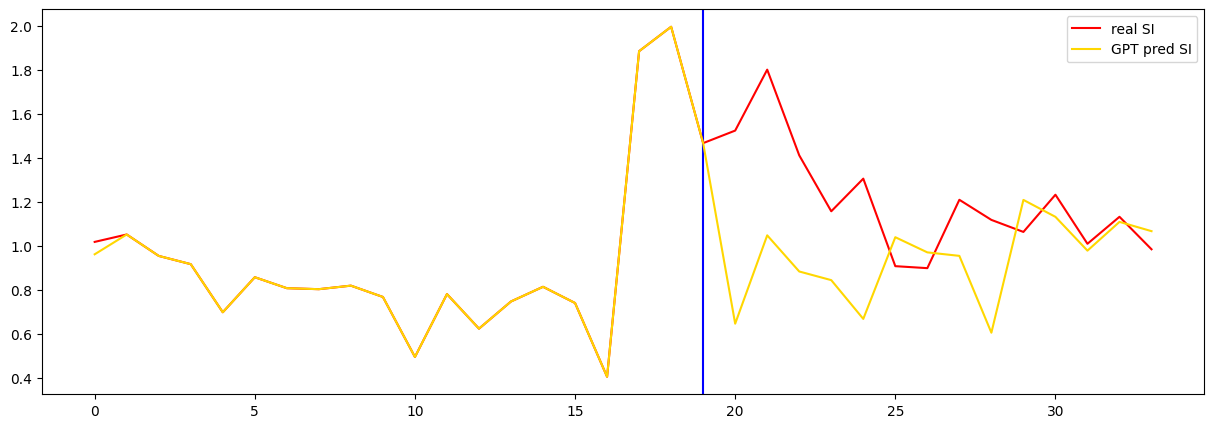

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  4.085325717926025
seq length of pred =  30
500 train loss =  4.503843784332275
seq length of pred =  30
1000 train loss =  4.4655585289001465
seq length of pred =  30
1500 train loss =  4.229346752166748
seq length of pred =  30
2000 train loss =  4.1813859939575195
seq length of pred =  30
2500 train loss =  4.0875372886657715
seq length of pred =  30


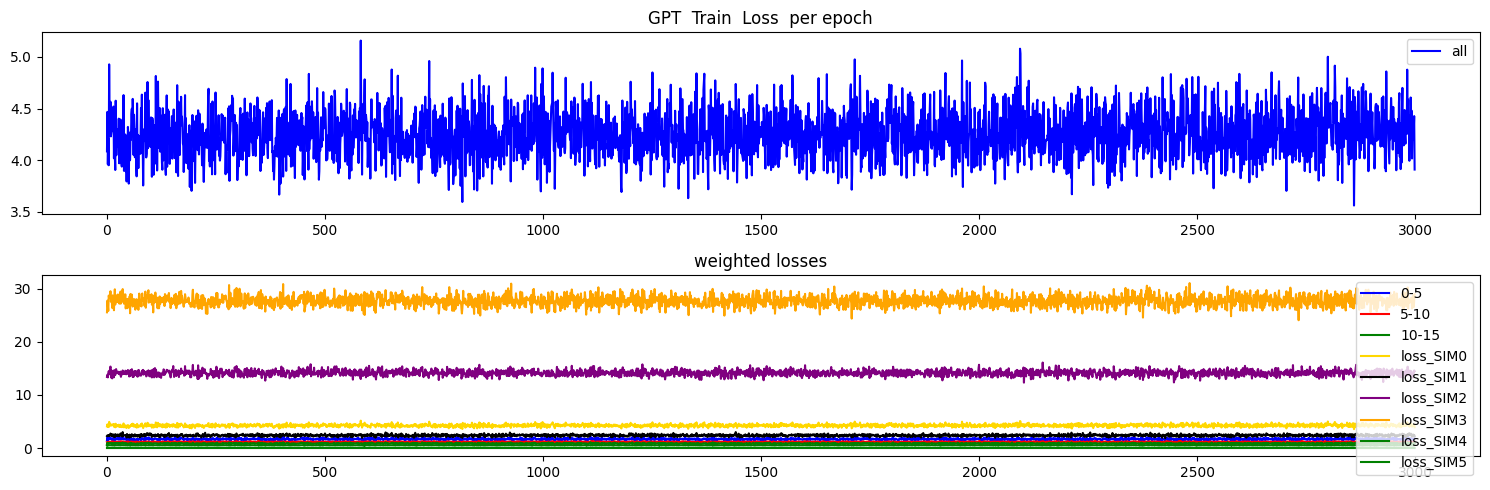

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.060905251652002335
Test MSE Loss - SI only 0-5:  0.11456970870494843
Test MSE Loss - SI only 5-10:  0.15144731104373932
Test MSE Loss - SI only 10-15:  0.030747253447771072
mae, mse, rmse, mape, mspe, rse, corr
(0.17399228, 0.060905248, 0.24678989, 3.0740945, 40.238228, 1.4172128)
Testing R**2 - SI only:  -1.0084919911632961
Testing R**2 - SI only:  -1.0084919911632961
Testing R**2 - All features:  0.9961314958400976
Testing R**2 - (f2) - SI full:  -0.5034384720392449


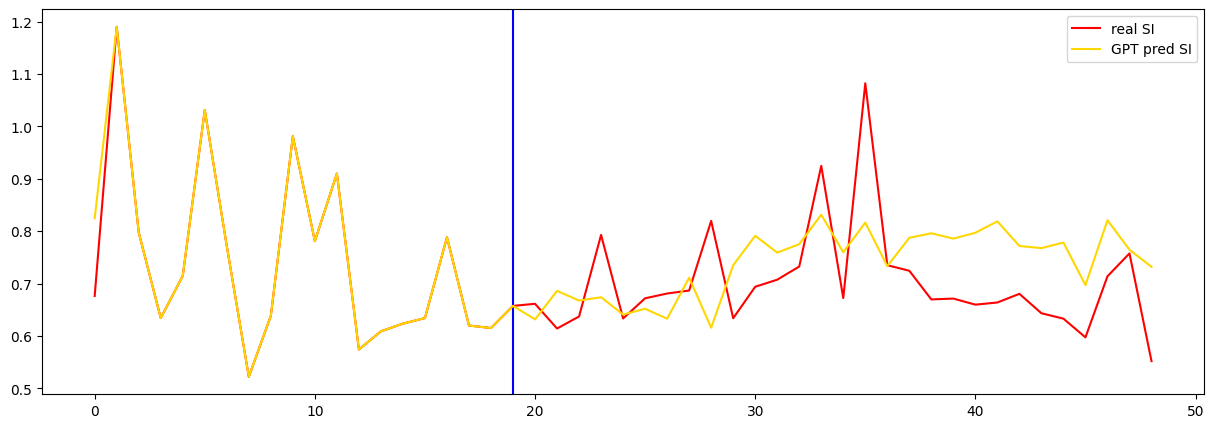

In [34]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  4.159386157989502
seq length of pred =  30
500 train loss =  4.218832015991211
seq length of pred =  30
1000 train loss =  4.317861557006836
seq length of pred =  30
1500 train loss =  4.409414291381836
seq length of pred =  30
2000 train loss =  4.189212322235107
seq length of pred =  30
2500 train loss =  4.488861560821533
seq length of pred =  30


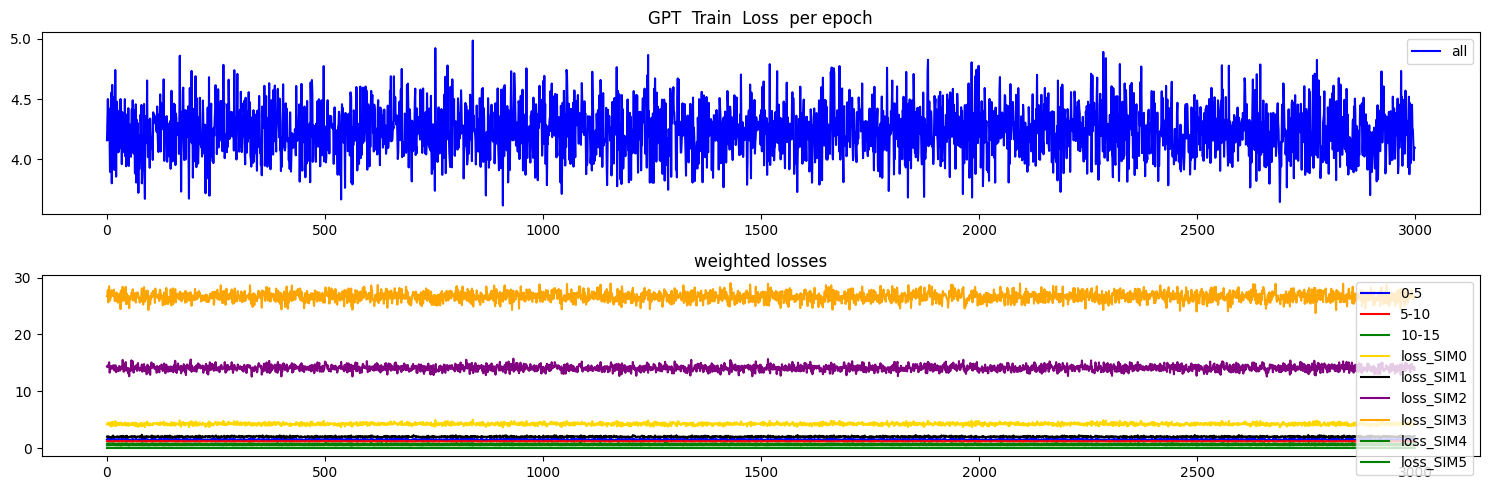

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.061439357697963715
Test MSE Loss - SI only 0-5:  0.08233799040317535
Test MSE Loss - SI only 5-10:  0.17024458944797516
Test MSE Loss - SI only 10-15:  0.014343681745231152
mae, mse, rmse, mape, mspe, rse, corr
(0.20878093, 0.061439358, 0.24786964, 3.7395878, 82.775246, 1.4833916)
Testing R**2 - SI only:  -1.2004503569529628
Testing R**2 - SI only:  -1.2004503569529628
Testing R**2 - All features:  0.9947116703200743
Testing R**2 - (f2) - SI full:  0.07100025714748215


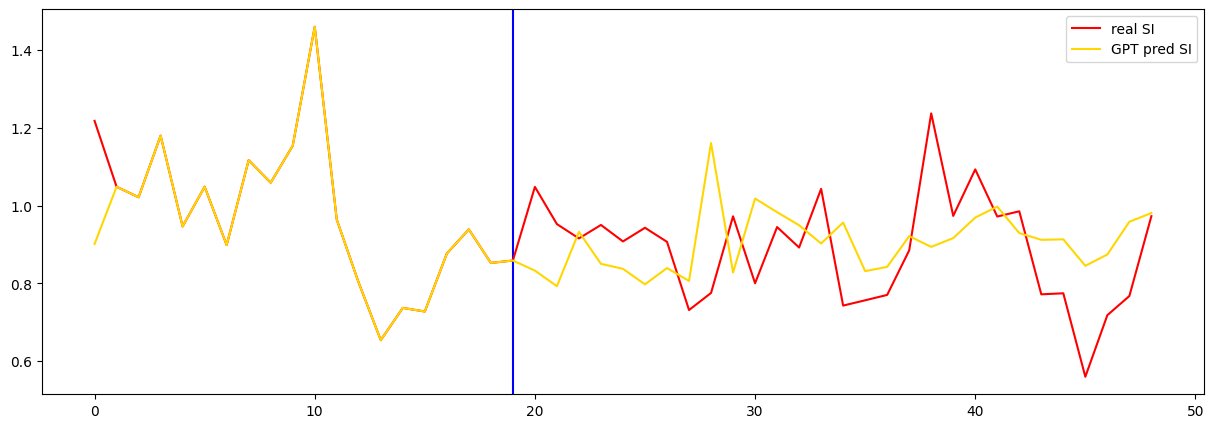

In [35]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  6.1986613273620605
seq length of pred =  30
500 train loss =  5.905282974243164
seq length of pred =  30
1000 train loss =  6.572225570678711
seq length of pred =  30
1500 train loss =  5.506553649902344
seq length of pred =  30
2000 train loss =  6.355300426483154
seq length of pred =  30
2500 train loss =  5.811545372009277
seq length of pred =  30


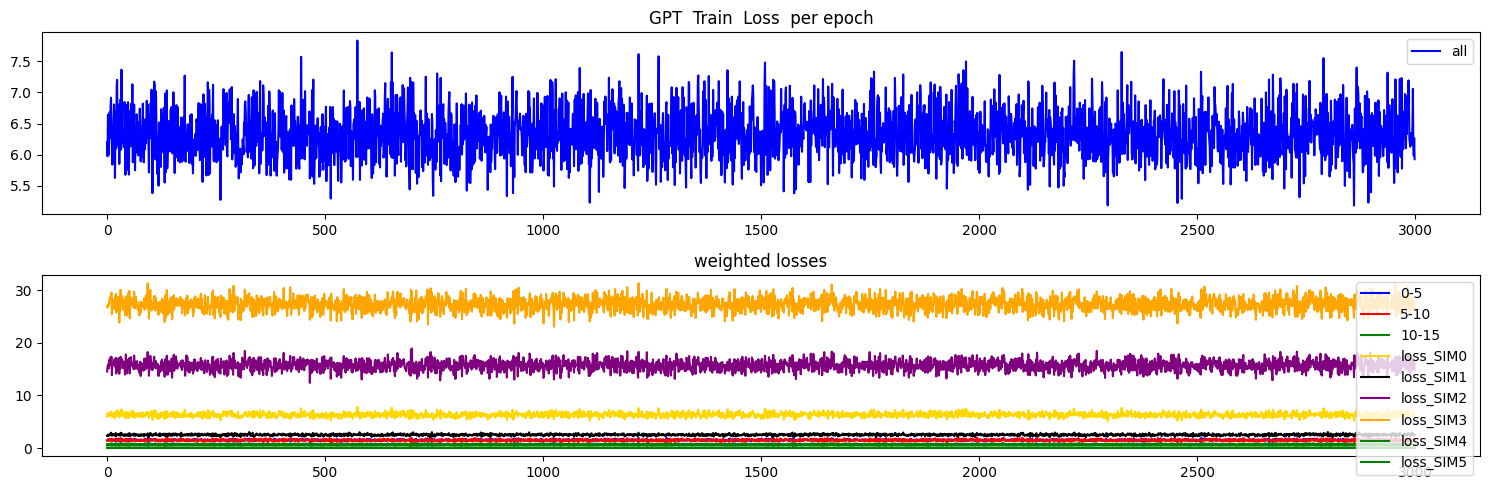

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.03298571705818176
Test MSE Loss - SI only 0-5:  0.006464369595050812
Test MSE Loss - SI only 5-10:  0.06259327381849289
Test MSE Loss - SI only 10-15:  0.014003641903400421
mae, mse, rmse, mape, mspe, rse, corr
(0.14124015, 0.032985717, 0.1816197, 4.317647, 106.57022, 1.2704111)
Testing R**2 - SI only:  -0.6139447557780808
Testing R**2 - SI only:  -0.6139447557780808
Testing R**2 - All features:  0.9948788397331579
Testing R**2 - (f2) - SI full:  -0.35569295874166795


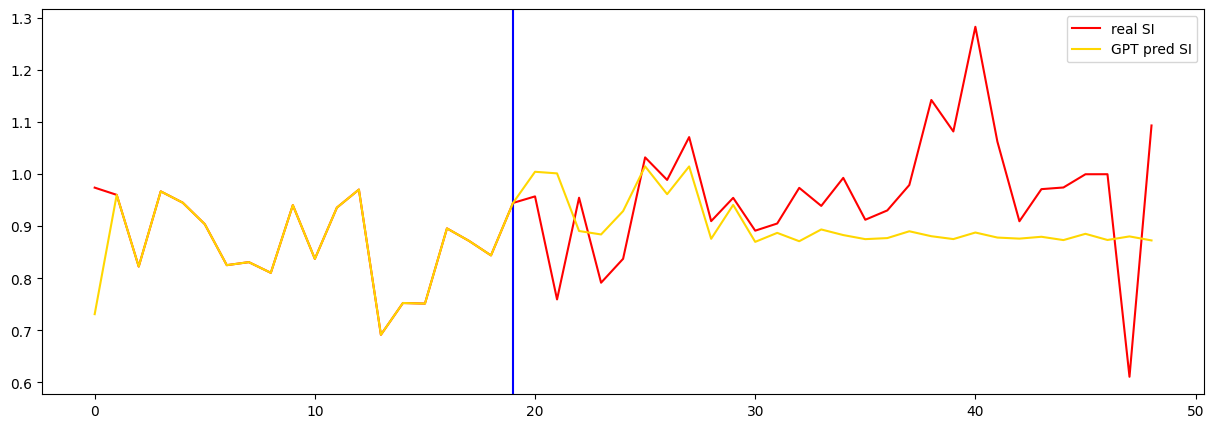

In [36]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  4.136960506439209
seq length of pred =  30
500 train loss =  4.343878746032715
seq length of pred =  30
1000 train loss =  3.8654751777648926
seq length of pred =  30
1500 train loss =  4.119024276733398
seq length of pred =  30
2000 train loss =  4.4496917724609375
seq length of pred =  30
2500 train loss =  4.3362250328063965
seq length of pred =  30


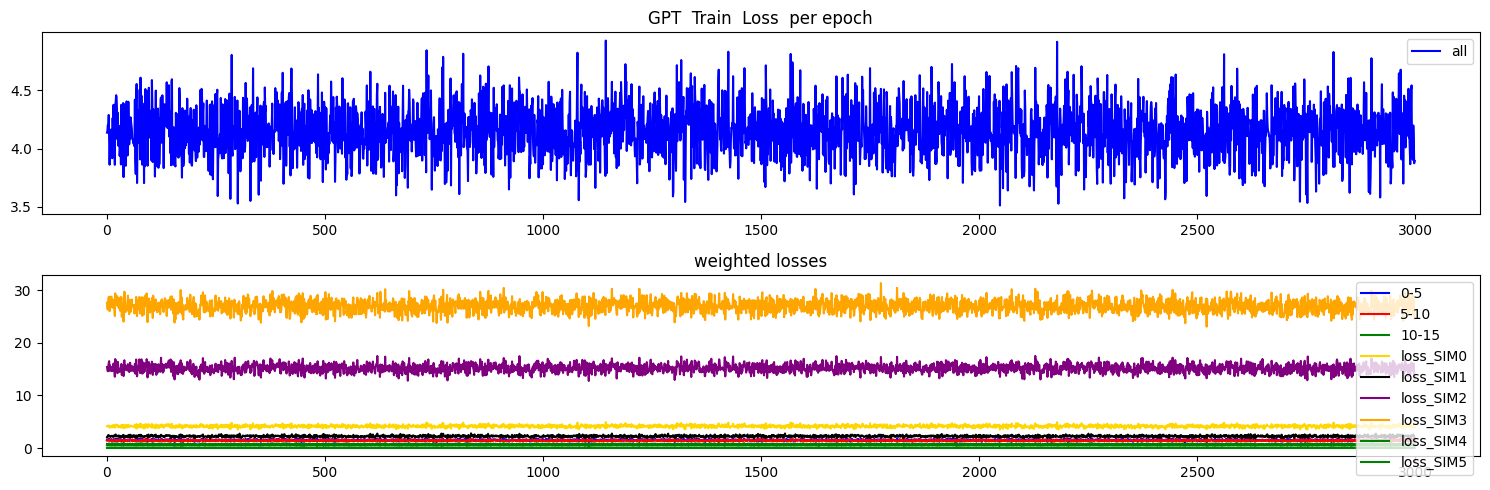

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.023548070341348648
Test MSE Loss - SI only 0-5:  0.007605154998600483
Test MSE Loss - SI only 5-10:  0.03687310963869095
Test MSE Loss - SI only 10-15:  0.022839343175292015
mae, mse, rmse, mape, mspe, rse, corr
(0.12864688, 0.02354807, 0.15345381, 2.3896112, 15.47032, 1.4395472)
Testing R**2 - SI only:  -1.072295953399192
Testing R**2 - SI only:  -1.072295953399192
Testing R**2 - All features:  0.992445777756203
Testing R**2 - (f2) - SI full:  -0.5588114063769833


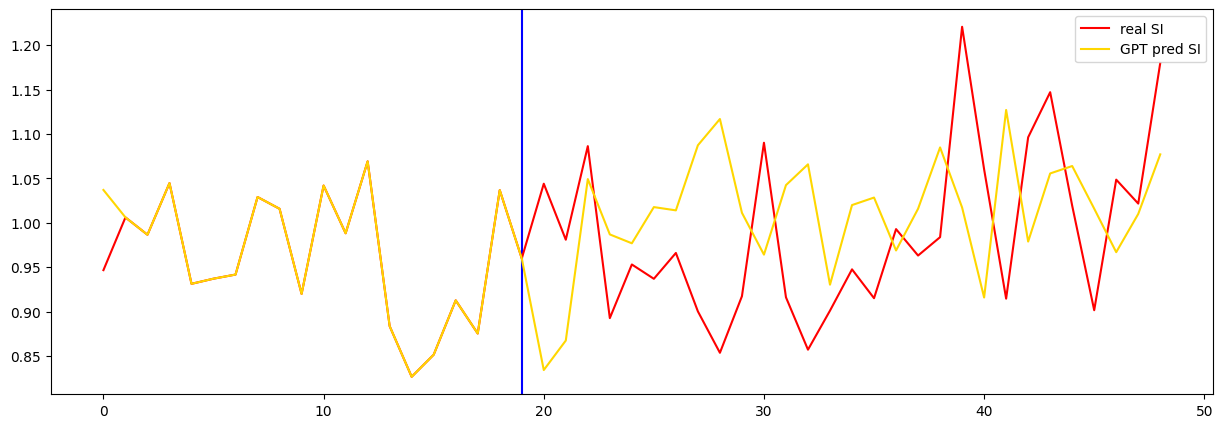

In [37]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  4.690118789672852
seq length of pred =  30
500 train loss =  5.119447231292725
seq length of pred =  30
1000 train loss =  4.998110771179199
seq length of pred =  30
1500 train loss =  4.65981388092041
seq length of pred =  30
2000 train loss =  4.815013885498047
seq length of pred =  30
2500 train loss =  4.929549694061279
seq length of pred =  30


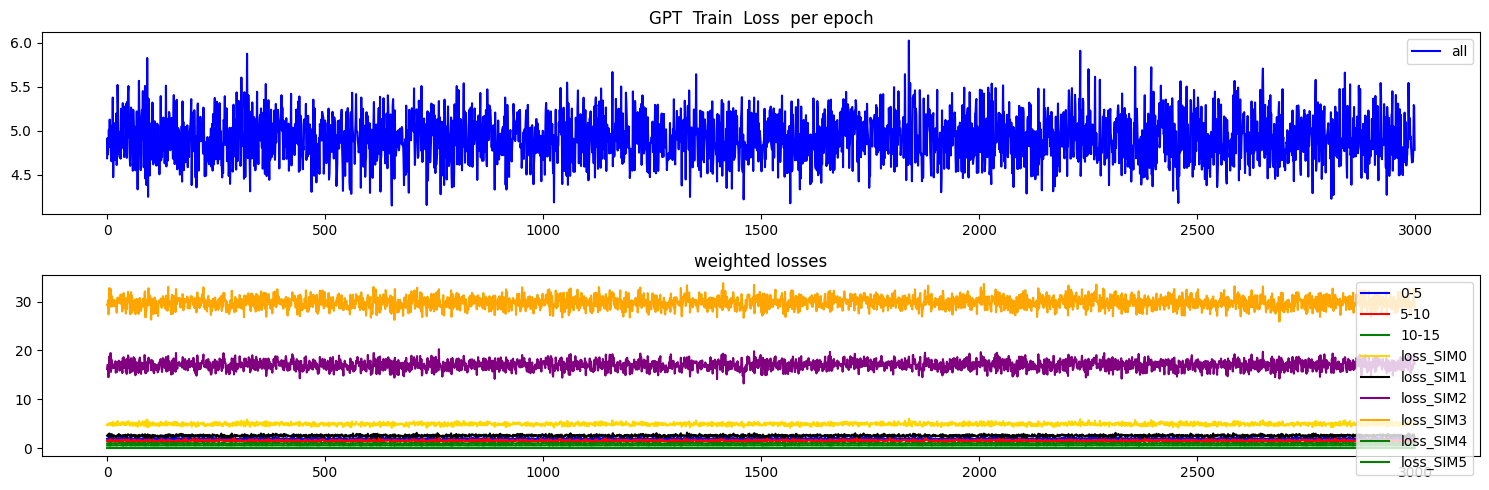

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.032718759030103683
Test MSE Loss - SI only 0-5:  0.04874324053525925
Test MSE Loss - SI only 5-10:  0.025117630138993263
Test MSE Loss - SI only 10-15:  0.04859474301338196
mae, mse, rmse, mape, mspe, rse, corr
(0.13750269, 0.032718766, 0.18088329, 9.272618, 1584.6855, 1.5250047)
Testing R**2 - SI only:  -1.3256390696755425
Testing R**2 - SI only:  -1.3256390696755425
Testing R**2 - All features:  0.9952892913225241
Testing R**2 - (f2) - SI full:  -0.40355503831767137


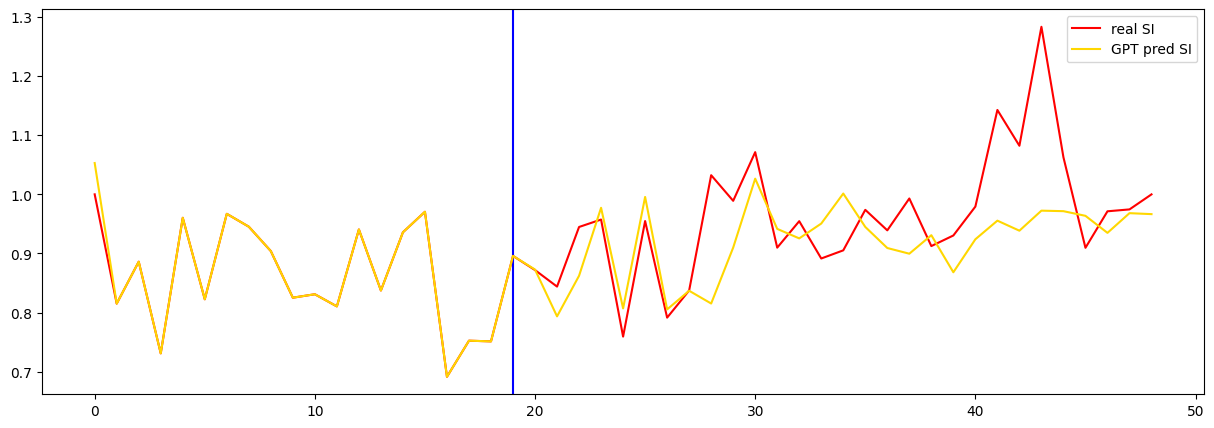

In [38]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  4.978770732879639
seq length of pred =  30
500 train loss =  4.9723076820373535
seq length of pred =  30
1000 train loss =  5.462006092071533
seq length of pred =  30
1500 train loss =  5.09950590133667
seq length of pred =  30
2000 train loss =  4.73276948928833
seq length of pred =  30
2500 train loss =  5.456969738006592
seq length of pred =  30


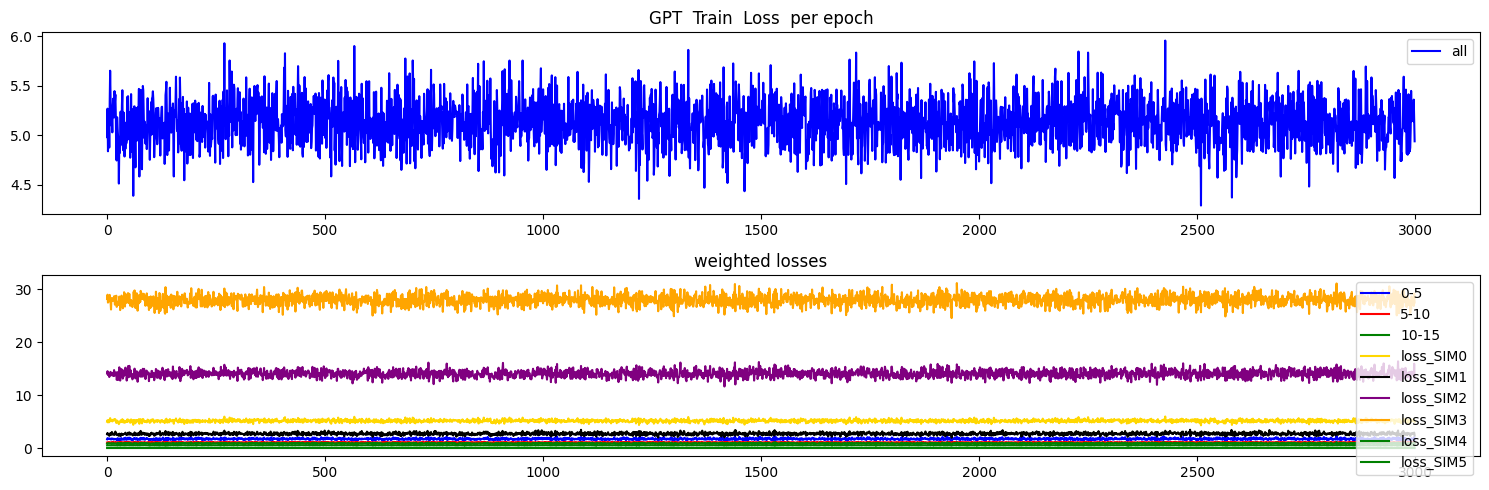

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04033324122428894
Test MSE Loss - SI only 0-5:  0.046441011130809784
Test MSE Loss - SI only 5-10:  0.13064095377922058
Test MSE Loss - SI only 10-15:  0.05092291906476021
mae, mse, rmse, mape, mspe, rse, corr
(0.1622097, 0.04033324, 0.20083137, 2.289515, 16.218813, 1.6256207)
Testing R**2 - SI only:  -1.6426429301527068
Testing R**2 - SI only:  -1.6426429301527068
Testing R**2 - All features:  0.9582754732067091
Testing R**2 - (f2) - SI full:  -0.7220775528451429


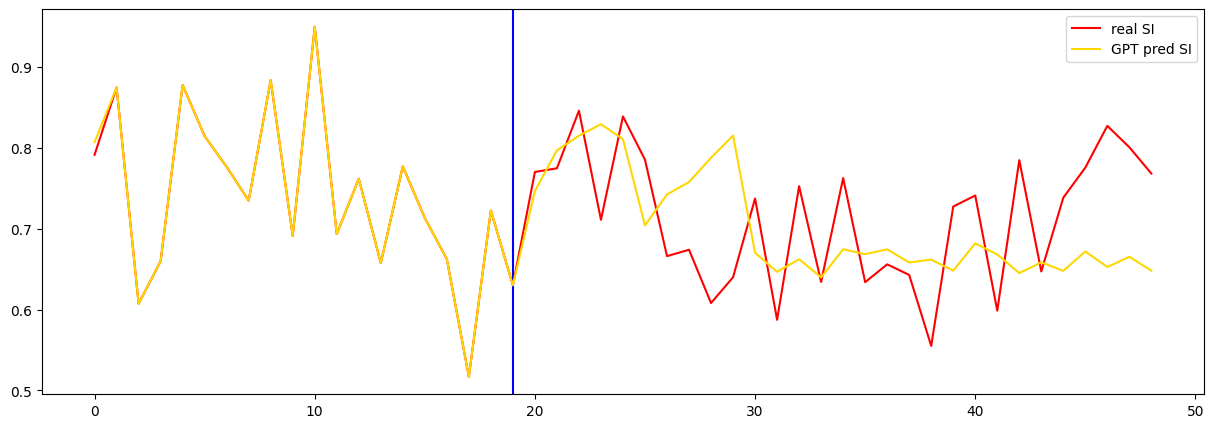

In [39]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  3.638319492340088
seq length of pred =  30
500 train loss =  3.6902146339416504
seq length of pred =  30
1000 train loss =  3.966090440750122
seq length of pred =  30
1500 train loss =  3.4268040657043457
seq length of pred =  30
2000 train loss =  3.2884414196014404
seq length of pred =  30
2500 train loss =  3.55338978767395
seq length of pred =  30


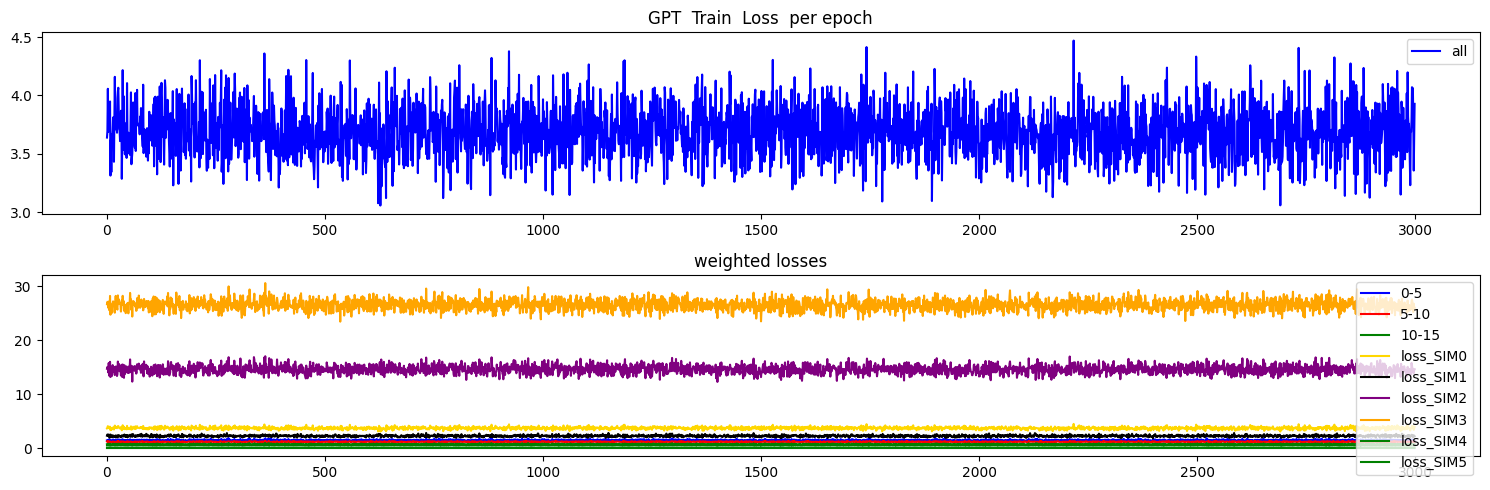

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05165962874889374
Test MSE Loss - SI only 0-5:  0.08079547435045242
Test MSE Loss - SI only 5-10:  0.19883814454078674
Test MSE Loss - SI only 10-15:  0.01493406854569912
mae, mse, rmse, mape, mspe, rse, corr
(0.17142437, 0.051659632, 0.22728756, 8.585443, 1675.2083, 1.1789004)
Testing R**2 - SI only:  -0.3898062385752483
Testing R**2 - SI only:  -0.3898062385752483
Testing R**2 - All features:  0.9636389258732225
Testing R**2 - (f2) - SI full:  0.022461666476730868


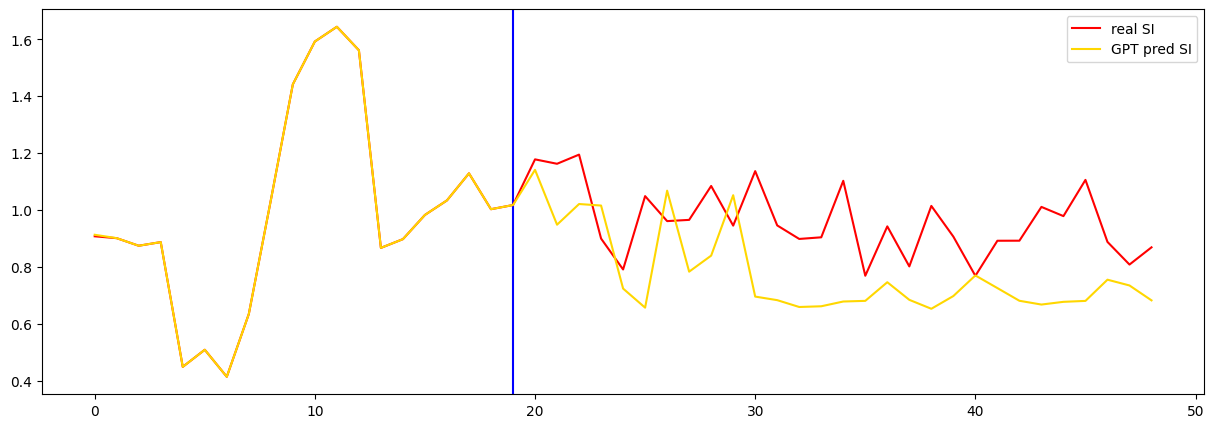

In [40]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [41]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [42]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
